In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import glob,os
import netCDF4
from datetime import datetime, timedelta
from matplotlib.dates import date2num
import pandas as pd
import h5py
from scipy.ndimage import gaussian_filter
from pyproj import Proj
from scipy.spatial import cKDTree
import seaborn as sns

In [3]:
path = '/data/keeling/a/kheimes2/more_space/Data/IMPACTS/'
day = '20200125'
day2 = '20230129'
fl_choice='P3'

In [4]:
def fldef_synch(day):   
    if day=='20200125':
        lowtype='MB'
        region='NE'
        er2_fl=[['2020-01-25 19:20:00', '2020-01-25 19:32:00', '1'],
                ['2020-01-25 20:00:30', '2020-01-25 20:17:00', '2'],
                ['2020-01-25 20:32:00', '2020-01-25 20:50:00', '3'],
                ['2020-01-25 21:04:30', '2020-01-25 21:22:15', '4'],
                ['2020-01-25 21:36:00', '2020-01-25 21:54:00', '5'],
                ['2020-01-25 22:13:15', '2020-01-25 22:22:15', '6'], # Not great coordination in time
                ['2020-01-25 22:21:00', '2020-01-25 22:31:00', '7'],
                ['2020-01-25 22:43:30', '2020-01-25 22:58:00', '8']] # Not great coordination in time
        p3_fl= [['2020-01-25 19:21:00', '2020-01-25 19:33:00', '1'], # P3 above of cloud echo?
                ['2020-01-25 20:02:00', '2020-01-25 20:19:30', '2'], # No cloud echo?
                ['2020-01-25 20:34:00', '2020-01-25 20:49:30', '3'], # P3 in then OUT of cloud?
                ['2020-01-25 21:02:00', '2020-01-25 21:21:00', '4'], # P3 OUT then in cloud?
                ['2020-01-25 21:34:00', '2020-01-25 21:51:00', '5'],
                ['2020-01-25 22:05:15', '2020-01-25 22:13:30', '6'], # P3 at cloud top?
                ['2020-01-25 22:17:45', '2020-01-25 22:27:00', '7'],
                ['2020-01-25 22:45:00', '2020-01-25 23:03:00', '8']] # P3 OUT then in cloud?
        wfile= path+'CRS/IMPACTS_CRS_L1B_RevB_20200125.h5'
        hifile_ka= path+'HIWRAP/IMPACTS2020_HIWRAP_L1B_RevD_'+day+'.h5'
        hifile_ku= path+'HIWRAP/IMPACTS2020_HIWRAP_L1B_RevD_'+day+'.h5'
        
    if day=='20200201':
        lowtype='MA'
        region='NE'
        er2_fl=[['2020-02-01 12:22:00', '2020-02-01 12:35:00', '1'], # Not great coordination at end
                ['2020-02-01 12:51:45', '2020-02-01 12:59:45', '2'], # Not great coordination at end
                ['2020-02-01 13:05:30', '2020-02-01 13:17:00', '3'], # Not great coordination at end
                ['2020-02-01 13:33:30', '2020-02-01 13:41:00', '4'], # Not great coordination in time and space
                ['2020-02-01 13:52:00', '2020-02-01 13:58:15', '5'], # Not great coordination in time and space
                ['2020-02-01 14:26:30', '2020-02-01 14:39:00', '6']] # Not great coordination in time and space
        
        p3_fl= [['2020-02-01 12:18:45', '2020-02-01 12:32:30', '1'], # P3 above cloud echo?
                ['2020-02-01 12:48:00', '2020-02-01 12:56:00', '2'], # P3 at cloud top?
                ['2020-02-01 13:01:15', '2020-02-01 13:19:45', '3'], 
                ['2020-02-01 13:35:00', '2020-02-01 13:42:30', '4'], 
                ['2020-02-01 13:52:30', '2020-02-01 13:59:00', '5'],
                ['2020-02-01 14:25:30', '2020-02-01 14:39:00', '6']] # P3 at cloud top?
        wfile= path+'CRS/IMPACTS_CRS_L1B_RevB_20200201.h5'
        hifile_ka= path+'HIWRAP/IMPACTS2020_HIWRAP_L1B_RevD_'+day+'.h5'
        hifile_ku= path+'HIWRAP/IMPACTS2020_HIWRAP_L1B_RevD_'+day+'.h5'
        
    if day=='20200205':
        lowtype='AF'
        region='MW'
        er2_fl=[['2020-02-05 20:56:00', '2020-02-05 21:28:00', '1'],
                ['2020-02-05 21:42:00', '2020-02-05 22:13:00', '2'],
                ['2020-02-05 22:34:00', '2020-02-05 22:59:00', '3'],
                ['2020-02-05 23:07:00', '2020-02-05 23:14:25', '4'],
                ['2020-02-05 23:42:00', '2020-02-05 23:53:00', '5']] # Not great coordination in time
        p3_fl=[['2020-02-05 20:53:30', '2020-02-05 21:30:00', '1'],  # P3 at cloud top?
               ['2020-02-05 21:37:15', '2020-02-05 22:19:00', '2'],
               ['2020-02-05 22:25:00', '2020-02-05 22:58:30', '3'],
               ['2020-02-05 23:04:00', '2020-02-05 23:15:00', '4'],  # Weak echo
               ['2020-02-05 23:30:00', '2020-02-05 23:44:30', '5']]  # Not great coordination in time
        wfile= path+'CRS/IMPACTS_CRS_L1B_RevB_20200205.h5'
        hifile_ka= path+'HIWRAP/IMPACTS2020_HIWRAP_L1B_RevD_'+day+'.h5'
        hifile_ku= path+'HIWRAP/IMPACTS2020_HIWRAP_L1B_RevD_'+day+'.h5'
        
    if day=='20200207':
        lowtype='MA'
        region='NE'
        er2_fl=[['2020-02-07 15:09:00', '2020-02-07 15:22:00', '1'], # Not great coordination in space
                ['2020-02-07 15:30:30', '2020-02-07 15:48:15', '2'], # Not great coordination in space
                ['2020-02-07 15:55:00', '2020-02-07 16:11:00', '3']] # Not great coordination in space
        p3_fl= [['2020-02-07 15:05:15', '2020-02-07 15:22:00', '1'], # P3 at cloud top
                ['2020-02-07 15:27:00', '2020-02-07 15:49:00', '2'], 
                ['2020-02-07 15:52:30', '2020-02-07 16:13:00', '3']] 
        wfile= path+'CRS/IMPACTS_CRS_L1B_RevB_20200207.h5'
        hifile_ka= path+'HIWRAP/IMPACTS2020_HIWRAP_L1B_RevD_'+day+'.h5'
        hifile_ku= path+'HIWRAP/IMPACTS2020_HIWRAP_L1B_RevD_'+day+'.h5'

    if day=='20200213':
### No CDP, King Probe, ER2
        lowtype='AF'
        er2_fl=[np.NaN]
        p3_fl=[]
        wfile=np.NaN
        hifile_ka=np.NaN
        hifile_ku=np.NaN
        
    if day=='20200218':
### No CDP, King Probe, ER2
        lowtype='GPC'
        er2_fl=[np.NaN]
        p3_fl=[]
        wfile=np.NaN
        hifile_ka=np.NaN
        hifile_ku=np.NaN

    if day=='20200220':
### No CDP, King Probe, ER2
        lowtype='MA'
        er2_fl=[np.NaN]
        p3_fl=[]
        wfile=np.NaN
        hifile_ka=np.NaN
        hifile_ku=np.NaN
    
    if day=='20200225':
### No CDP, King Probe
        lowtype='AF'
        region='MW'
        er2_fl=[['2020-02-25 21:46:00', '2020-02-25 21:59:30', '1'],
                ['2020-02-25 22:09:00', '2020-02-25 22:21:30', '2'], 
                ['2020-02-25 22:31:00', '2020-02-25 22:43:30', '3'],
                ['2020-02-25 22:55:30', '2020-02-25 23:09:30', '4'], # Not great coordination at end
                ['2020-02-25 23:49:00', '2020-02-26 00:02:30', '5'],
                ['2020-02-26 00:28:00', '2020-02-26 00:41:00', '6'], 
                ['2020-02-26 00:49:00', '2020-02-26 01:01:30', '7'], # Not great coordination in space
                ['2020-02-26 01:08:00', '2020-02-26 01:21:00', '8'], # No great coordination in space
                ['2020-02-26 01:28:30', '2020-02-26 01:41:00', '9']]
        p3_fl= [['2020-02-25 21:45:30', '2020-02-25 22:04:00', '1'], # P3 above cloud echo?
                ['2020-02-25 22:07:30', '2020-02-25 22:25:30', '2'], # P3 in then OUT cloud
                ['2020-02-25 22:29:00', '2020-02-25 22:47:30', '3'],
                ['2020-02-25 22:51:45', '2020-02-25 23:12:00', '4'], # P3 at cloud top?
                ['2020-02-25 23:43:30', '2020-02-26 00:02:00', '5'], # No echo?
                ['2020-02-26 00:26:30', '2020-02-26 00:42:30', '6'], 
                ['2020-02-26 00:47:00', '2020-02-26 01:03:00', '7'], 
                ['2020-02-26 01:06:30', '2020-02-26 01:22:30', '8'], # No echo?
                ['2020-02-26 01:26:30', '2020-02-26 01:43:30', '9']]
        wfile=path+'CRS/IMPACTS_CRS_L1B_RevB_20200225.h5'
        hifile_ka= path+'HIWRAP/IMPACTS2020_HIWRAP_L1B_RevD_'+day+'.h5'
        hifile_ku= path+'HIWRAP/IMPACTS2020_HIWRAP_L1B_RevD_'+day+'.h5'
    if day=='20200227':
### No P3
        lowtype='MB'
        er2_fl=[#['2020-02-27 08:23:00', '2020-02-27 08:30:19', '0'],
                #['2020-02-27 08:30:55', '2020-02-27 08:55:31', '0'],
                #['2020-02-27 08:57:09', '2020-02-27 09:14:45', '0'],
                ['2020-02-27 09:15:20', '2020-02-27 09:45:52', '1'],
                ['2020-02-27 09:49:03', '2020-02-27 10:16:37', '2'],
                ['2020-02-27 10:20:23', '2020-02-27 10:49:46', '3'],
                ['2020-02-27 10:53:06', '2020-02-27 11:20:39', '4'],
                ['2020-02-27 11:24:05', '2020-02-27 11:45:41', '5'],
                ['2020-02-27 11:49:05', '2020-02-27 12:09:31', '6'],
                ['2020-02-27 12:12:42', '2020-02-27 12:27:05', '7'],
                ['2020-02-27 12:32:26', '2020-02-27 12:45:45', '8'],
                ['2020-02-27 12:49:49', '2020-02-27 13:04:00', '9']]
        p3_fl= [np.NaN]
        wfile=path+'CRS/IMPACTS_CRS_L1B_RevB_20200227.h5'
        hifile_ka= path+'HIWRAP/IMPACTS2020_HIWRAP_L1B_RevD_'+day+'.h5'
        hifile_ku= path+'HIWRAP/IMPACTS2020_HIWRAP_L1B_RevD_'+day+'.h5'

    if day=='20220119':
### No CDP, 2DS, HVPS
        lowtype='AC'
        er2_fl=[#['2022-01-19 11:50:07', '2022-01-19 12:28:00', '0'],
                ['2022-01-19 12:30:00', '2022-01-19 12:50:00', '1'],
                ['2022-01-19 12:58:00', '2022-01-19 13:09:38', '2'],
                ['2022-01-19 13:16:00', '2022-01-19 13:24:00', '3'],
                ['2022-01-19 13:37:38', '2022-01-19 13:57:33', '4'],
                ['2022-01-19 14:07:00', '2022-01-19 14:16:53', '5'],
                ['2022-01-19 14:24:00', '2022-01-19 14:30:43', '6'],
                ['2022-01-19 14:44:38', '2022-01-19 14:52:38', '7'],
                ['2022-01-19 15:00:00', '2022-01-19 15:10:00', '8'],
                ['2022-01-19 15:17:18', '2022-01-19 15:29:03', '9'],
                ['2022-01-19 15:35:30', '2022-01-19 15:45:13', '10']]#,
               #['2022-01-19 15:48:00', '2022-01-19 16:29:28', '0']]
        p3_fl= [np.NaN]
        wfile= path+'CRS/IMPACTS_CRS_L1B_RevA_20220119.h5'
        hifile_ka= path+'HIWRAP/IMPACTS2022_HIWRAP_KA_L1B_RevB_'+day+'.h5'
        hifile_ku= path+'HIWRAP/IMPACTS2022_HIWRAP_KU_L1B_RevB_'+day+'.h5'

    if day=='20220129':
# No 2DS, HVPS
        lowtype='MA'
        er2_fl=[#['2022-01-29 23:20:00', '2022-01-29 23:57:01', '0'],
                ['2022-01-29 23:59:56', '2022-01-30 00:08:46', '1'],
                ['2022-01-30 00:16:00', '2022-01-30 00:23:00', '2'],
                ['2022-01-30 00:32:56', '2022-01-30 00:38:51', '3'],
                ['2022-01-30 00:44:30', '2022-01-30 00:48:00', '4'],
                ['2022-01-30 00:53:51', '2022-01-30 01:03:00', '5'],
                ['2022-01-30 01:08:30', '2022-01-30 01:11:00', '6'],
                ['2022-01-30 01:14:36', '2022-01-30 01:23:00', '7'],
                ['2022-01-30 01:31:30', '2022-01-30 01:56:16', '8']]#,
                #['2022-01-30 01:58:00', '2022-01-30 02:10:00', '0']]
        p3_fl= [np.NaN]
        wfile= path+'CRS/IMPACTS_CRS_L1B_RevA_20220129.h5'
        hifile_ka= path+'HIWRAP/IMPACTS2022_HIWRAP_KA_L1B_RevB_'+day+'.h5'
        hifile_ku= path+'HIWRAP/IMPACTS2022_HIWRAP_KU_L1B_RevB_'+day+'.h5'

    if day=='20220203':
# No 2DS, HVPS
        lowtype='AF'
        er2_fl=[#['2022-02-03 14:00:00', '2022-02-03 14:40:00', '1'], #going out
                ['2022-02-03 14:42:30', '2022-02-03 15:17:00', '1'],
                ['2022-02-03 15:28:00', '2022-02-03 16:04:00', '2']]
                #['2022-02-03 16:06:00', '2022-02-03 16:32:00', '4']] #RTB
        p3_fl= [np.NaN]
        wfile= path+'CRS/IMPACTS_CRS_L1B_RevA_20220203.h5'
        hifile_ka= path+'HIWRAP/IMPACTS2022_HIWRAP_KA_L1B_RevB_'+day+'.h5'
        hifile_ku= path+'HIWRAP/IMPACTS2022_HIWRAP_KU_L1B_RevB_'+day+'.h5'

    if day=='20220204':
# No 2DS, HVPS
        lowtype='AF'
        er2_fl=[#['2022-02-04 12:55:00', '2022-02-04 13:35:00', '1'], #going out
                ['2022-02-04 13:43:30', '2022-02-04 14:12:00', '1'],
                ['2022-02-04 14:41:00', '2022-02-04 15:10:30', '2'],
                ['2022-02-04 15:21:00', '2022-02-04 15:52:00', '3'],
                ['2022-02-04 16:04:00', '2022-02-04 16:44:30', '4'],
                ['2022-02-04 16:50:00', '2022-02-04 17:28:00', '5'],
                ['2022-02-04 17:37:00', '2022-02-04 18:14:00', '6']]
                #['2022-02-04 18:21:30', '2022-02-04 19:12:00', '8'], #RTB pt 1
                #['2022-02-04 19:13:00', '2022-02-04 19:56:00', '9']] #RTB pt 2
        p3_fl= [np.NaN]
        wfile= path+'CRS/IMPACTS_CRS_L1B_RevA_20220204.h5'
        hifile_ka= path+'HIWRAP/IMPACTS2022_HIWRAP_KA_L1B_RevB_'+day+'.h5'
        hifile_ku= path+'HIWRAP/IMPACTS2022_HIWRAP_KU_L1B_RevB_'+day+'.h5'

    if day=='20220208':
        lowtype='MA'
        region='NE'
        er2_fl=[['2022-02-08 13:47:00', '2022-02-08 13:57:30', '1'],
                ['2022-02-08 14:25:30', '2022-02-08 14:45:15', '2'], # Not great coordination towards end
                ['2022-02-08 15:43:00', '2022-02-08 16:08:30', '3'], # Not great coordination in the beginning
                ['2022-02-08 16:21:00', '2022-02-08 16:41:00', '4']]
        p3_fl= [['2022-02-08 13:39:00', '2022-02-08 13:52:45', '1'],
                ['2022-02-08 14:19:00', '2022-02-08 14:48:45', '2'],
                ['2022-02-08 15:35:00', '2022-02-08 16:10:00', '3'],
                ['2022-02-08 16:15:00', '2022-02-08 16:47:00', '4']]
        wfile= path+'CRS/IMPACTS_CRS_L1B_RevA_20220208.h5'
        hifile_ka= path+'HIWRAP/IMPACTS2022_HIWRAP_KA_L1B_RevB_'+day+'.h5'
        hifile_ku= path+'HIWRAP/IMPACTS2022_HIWRAP_KU_L1B_RevB_'+day+'.h5'

    if day=='20220213':
        lowtype='AF'
        region='NE'
        er2_fl=[['2022-02-13 12:47:00', '2022-02-13 12:55:45', '1'], # Not great coordination
                ['2022-02-13 13:17:30', '2022-02-13 13:30:00', '2']]
        p3_fl= [['2022-02-13 12:47:00', '2022-02-13 12:56:45', '1'],
                ['2022-02-13 13:10:00', '2022-02-13 13:37:00', '2']] # P3 above cloud
        wfile= path+'CRS/IMPACTS_CRS_L1B_RevA_20220213.h5'
        hifile_ka= path+'HIWRAP/IMPACTS2022_HIWRAP_KA_L1B_RevB_'+day+'.h5'
        hifile_ku= path+'HIWRAP/IMPACTS2022_HIWRAP_KU_L1B_RevB_'+day+'.h5'

    if day=='20220217':
        lowtype='AF'
        region='MW'
        er2_fl=[['2022-02-17 19:05:30', '2022-02-17 19:26:30', '1'], # Not great coordination at end
                ['2022-02-17 19:44:00', '2022-02-17 19:56:00', '2'], # Not great coordination in time at end
                ['2022-02-17 20:14:00', '2022-02-17 20:33:45', '3'], # Not great coordination at end
                ['2022-02-17 20:43:00', '2022-02-17 20:58:30', '4'], # Not great coordination in time or space
                ['2022-02-17 21:16:15', '2022-02-17 21:32:00', '5'], # Not great coordination at end
                ['2022-02-17 21:42:45', '2022-02-17 21:58:30', '6'], # Not great coordination in time or space
                ['2022-02-17 22:14:00', '2022-02-17 22:32:00', '7']] 
        p3_fl= [['2022-02-17 18:59:00', '2022-02-17 19:25:50', '1'],
                ['2022-02-17 19:43:30', '2022-02-17 20:04:00', '2'],
                ['2022-02-17 20:10:00', '2022-02-17 20:35:04', '3'],
                ['2022-02-17 20:39:00', '2022-02-17 21:06:45', '4'], 
                ['2022-02-17 21:11:15', '2022-02-17 21:33:00', '5'],
                ['2022-02-17 21:38:00', '2022-02-17 22:04:30', '6'], 
                ['2022-02-17 22:12:15', '2022-02-17 22:36:15', '7']]
        wfile= path+'CRS/IMPACTS_CRS_L1B_RevA_20220217.h5'
        hifile_ka= path+'HIWRAP/IMPACTS2022_HIWRAP_KA_L1B_RevB_'+day+'.h5'
        hifile_ku= path+'HIWRAP/IMPACTS2022_HIWRAP_KU_L1B_RevB_'+day+'.h5'

    if day=='20220219':
        lowtype='AC'
        region='NE'
        er2_fl=[['2022-02-19 13:42:00', '2022-02-19 13:54:00', '1'], 
                ['2022-02-19 14:11:00', '2022-02-19 14:30:15', '2'],
                ['2022-02-19 14:44:30', '2022-02-19 14:54:00', '3']]
        p3_fl= [['2022-02-19 13:39:00', '2022-02-19 14:01:00', '1'], 
                ['2022-02-19 14:05:00', '2022-02-19 14:34:30', '2'],
                ['2022-02-19 14:45:00', '2022-02-19 15:00:45', '3']]
        wfile= path+'CRS/IMPACTS_CRS_L1B_RevB_20220219.h5'
        hifile_ka= path+'HIWRAP/IMPACTS2022_HIWRAP_KA_L1B_RevB_'+day+'.h5'
        hifile_ku= path+'HIWRAP/IMPACTS2022_HIWRAP_KU_L1B_RevB_'+day+'.h5'

    if day=='20220225':
### P3 went out after ER2
        lowtype='MB'
        er2_fl=[#['2022-02-25 08:50:00', '2022-02-25 08:59:00', '0'],
                #['2022-02-25 09:01:00', '2022-02-25 09:07:00', '0'],
                #['2022-02-25 09:09:00', '2022-02-25 09:17:00', '0'],
                ['2022-02-25 09:18:00', '2022-02-25 09:34:00', '1'],
                ['2022-02-25 09:42:00', '2022-02-25 09:59:30', '2'],
                ['2022-02-25 10:06:30', '2022-02-25 10:25:00', '3'],
                ['2022-02-25 10:33:30', '2022-02-25 10:51:00', '4'],
                ['2022-02-25 11:00:30', '2022-02-25 11:16:20', '5'],
                ['2022-02-25 11:24:30', '2022-02-25 11:42:30', '6'],
                ['2022-02-25 11:52:00', '2022-02-25 12:08:00', '7'],
                ['2022-02-25 12:16:30', '2022-02-25 12:33:00', '8'],
                ['2022-02-25 12:41:00', '2022-02-25 12:58:50', '9'],
                ['2022-02-25 13:08:14', '2022-02-25 13:24:30', '10']]#,
                #['2022-02-25 13:26:00', '2022-02-25 14:05:00', '0']]
        p3_fl= []
        wfile= path+'CRS/IMPACTS_CRS_L1B_RevA_20220225.h5'
        hifile_ka= path+'HIWRAP/IMPACTS2022_HIWRAP_KA_L1B_RevB_'+day+'.h5'
        hifile_ku= path+'HIWRAP/IMPACTS2022_HIWRAP_KU_L1B_RevB_'+day+'.h5'

    if day=='20230113':
        lowtype='GPC'
        region='NE'
        er2_fl=[['2023-01-13 05:53:00', '2023-01-13 06:15:00', '1'],
                ['2023-01-13 06:32:00', '2023-01-13 06:54:30', '2'],
                ['2023-01-13 07:03:45', '2023-01-13 07:26:00', '3'],
                ['2023-01-13 07:42:30', '2023-01-13 08:04:00', '4'],
                ['2023-01-13 08:20:00', '2023-01-13 08:33:15', '5']]
        p3_fl= [['2023-01-13 05:51:30', '2023-01-13 06:17:45', '1'], 
                ['2023-01-13 06:24:00', '2023-01-13 06:57:00', '2'], # P3 at cloud top?
                ['2023-01-13 07:02:15', '2023-01-13 07:30:00', '3'],
                ['2023-01-13 07:35:00', '2023-01-13 08:09:00', '4'], # STOPPED checking P3 alt after this FL
                ['2023-01-13 08:14:15', '2023-01-13 08:33:00', '5']]
        wfile=path+'CRS/IMPACTS_CRS_L1B_Rev-_20230113.h5'
        hifile_ka= path+'HIWRAP/IMPACTS2023_HIWRAP_KA_L1B_RevA_'+day+'.h5'
        hifile_ku= path+'HIWRAP/IMPACTS2023_HIWRAP_KU_L1B_RevA_'+day+'.h5'

    if day=='20230115':
        lowtype='Tropical'
        region='NE'
        er2_fl=[['2023-01-15 15:01:00', '2023-01-15 15:23:00', '1'],
                ['2023-01-15 16:03:30', '2023-01-15 16:23:00', '2'], # Not great coordination in space
                ['2023-01-15 16:43:00', '2023-01-15 17:05:00', '3'],
                ['2023-01-15 17:13:00', '2023-01-15 17:34:00', '4'],
                ['2023-01-15 17:46:30', '2023-01-15 18:08:30', '5']]
        p3_fl= [['2023-01-15 14:52:15', '2023-01-15 15:23:00', '1'],
                ['2023-01-15 16:01:30', '2023-01-15 16:25:30', '2'],  # og 16:26:00
                ['2023-01-15 16:39:00', '2023-01-15 17:07:00', '3'],
                ['2023-01-15 17:11:30', '2023-01-15 17:39:00', '4'],
                ['2023-01-15 17:43:00', '2023-01-15 18:12:30', '5']]
        wfile=path+'CRS/IMPACTS_CRS_L1B_Rev-_20230115.h5'
        hifile_ka= path+'HIWRAP/IMPACTS2023_HIWRAP_KA_L1B_RevA_'+day+'.h5'
        hifile_ku= path+'HIWRAP/IMPACTS2023_HIWRAP_KU_L1B_RevA_'+day+'.h5'

    if day=='20230119':
        lowtype='GPC'
        region='NE'
        er2_fl=[['2023-01-19 21:41:00', '2023-01-19 22:04:45', '1'],
                ['2023-01-19 22:19:30', '2023-01-19 22:41:30', '2'], # Not great coordination at end
                ['2023-01-19 23:08:00', '2023-01-19 23:25:06', '3'], # Not great coordination at end
                ['2023-01-19 23:39:00', '2023-01-19 23:55:25', '4'],
                ['2023-01-20 00:11:00', '2023-01-20 00:28:30', '5'],
                ['2023-01-20 00:37:00', '2023-01-20 00:45:00', '6'],
                ['2023-01-20 01:07:00', '2023-01-20 01:19:20', '7']] # Approach from opposite directions
        p3_fl= [['2023-01-19 21:41:00', '2023-01-19 22:09:15', '1'],
                ['2023-01-19 22:14:00', '2023-01-19 22:48:00', '2'],
                ['2023-01-19 23:08:00', '2023-01-19 23:28:30', '3'],
                ['2023-01-19 23:35:00', '2023-01-20 00:01:00', '4'],
                ['2023-01-20 00:06:00', '2023-01-20 00:27:15', '5'],
                ['2023-01-20 00:32:00', '2023-01-20 00:44:00', '6'],
                ['2023-01-20 01:08:00', '2023-01-20 01:23:00', '7']]
        wfile=path+'CRS/IMPACTS_CRS_L1B_Rev-_20230119.h5'
        hifile_ka= path+'HIWRAP/IMPACTS2023_HIWRAP_KA_L1B_RevA_'+day+'.h5'
        hifile_ku= path+'HIWRAP/IMPACTS2023_HIWRAP_KU_L1B_RevA_'+day+'.h5'

    if day=='20230123':
        lowtype='MA'
        region='NE'
        er2_fl=[['2023-01-23 14:21:00', '2023-01-23 14:46:00', '1'],
                ['2023-01-23 14:58:00', '2023-01-23 15:20:45', '2'],
                ['2023-01-23 15:35:00', '2023-01-23 15:47:25', '3'],
                ['2023-01-23 16:07:07', '2023-01-23 16:21:15', '4'],
                ['2023-01-23 16:37:00', '2023-01-23 16:48:00', '5']]
        p3_fl= [['2023-01-23 14:16:48', '2023-01-23 14:48:00', '1'],
                ['2023-01-23 14:53:45', '2023-01-23 15:25:00', '2'],
                ['2023-01-23 15:30:50', '2023-01-23 15:48:49', '3'],
                ['2023-01-23 16:02:50', '2023-01-23 16:24:45', '4'],
                ['2023-01-23 16:34:50', '2023-01-23 16:49:30', '5']]
        wfile=path+'CRS/IMPACTS_CRS_L1B_Rev-_20230123.h5'
        hifile_ka= path+'HIWRAP/IMPACTS2023_HIWRAP_KA_L1B_RevA_'+day+'.h5'
        hifile_ku= path+'HIWRAP/IMPACTS2023_HIWRAP_KU_L1B_RevA_'+day+'.h5'
        
    if day=='20230125':
        lowtype='GPC'
        region='NE'
        er2_fl=[['2023-01-25 19:17:45', '2023-01-25 19:38:00', '1'],
                ['2023-01-25 19:52:00', '2023-01-25 20:12:06', '2'],
                ['2023-01-25 20:25:06', '2023-01-25 20:44:06', '3'],
                ['2023-01-25 21:12:30', '2023-01-25 21:23:30', '4'],
                ['2023-01-25 21:33:00', '2023-01-25 21:50:15', '5'],
                ['2023-01-25 22:01:30', '2023-01-25 22:21:00', '6'],
                ['2023-01-25 22:32:15', '2023-01-25 22:51:00', '7'],
                ['2023-01-25 23:03:06', '2023-01-25 23:22:00', '8']]
        p3_fl= [['2023-01-25 19:16:30', '2023-01-25 19:39:45', '1'],
                ['2023-01-25 19:46:30', '2023-01-25 20:21:00', '2'],
                ['2023-01-25 20:24:57', '2023-01-25 20:46:00', '3'],
                ['2023-01-25 21:10:00', '2023-01-25 21:24:45', '4'],
                ['2023-01-25 21:31:30', '2023-01-25 21:51:57', '5'],
                ['2023-01-25 21:56:57', '2023-01-25 22:25:00', '6'],
                ['2023-01-25 22:31:00', '2023-01-25 22:53:30', '7'],
                ['2023-01-25 22:59:30', '2023-01-25 23:24:30', '8']]
        wfile=path+'CRS/IMPACTS_CRS_L1B_Rev-_20230125.h5'
        hifile_ka= path+'HIWRAP/IMPACTS2023_HIWRAP_KA_L1B_RevA_'+day+'.h5'
        hifile_ku= path+'HIWRAP/IMPACTS2023_HIWRAP_KU_L1B_RevA_'+day+'.h5'

    if day=='20230129':
        lowtype='AF'
        region='NE'
        er2_fl=[['2023-01-29 14:53:45', '2023-01-29 15:15:00', '1'],
                ['2023-01-29 15:27:45', '2023-01-29 15:43:06', '2'],
                ['2023-01-29 15:55:30', '2023-01-29 16:13:00', '3'],
                ['2023-01-29 16:22:00', '2023-01-29 16:40:30', '4']]
        p3_fl= [['2023-01-29 14:46:15', '2023-01-29 15:18:15', '1'],
                ['2023-01-29 15:23:00', '2023-01-29 15:46:00', '2'],
                ['2023-01-29 15:51:00', '2023-01-29 16:13:30', '3'],
                ['2023-01-29 16:18:30', '2023-01-29 16:46:15', '4']]
        wfile=path+'CRS/IMPACTS_CRS_L1B_Rev-_20230129.h5'
        hifile_ka= path+'HIWRAP/IMPACTS2023_HIWRAP_KA_L1B_RevA_'+day+'.h5'
        hifile_ku= path+'HIWRAP/IMPACTS2023_HIWRAP_KU_L1B_RevA_'+day+'.h5'

    if day=='20230205':
        lowtype='Jet Streak'
        region='NE'
        er2_fl=[['2023-02-05 15:16:12', '2023-02-05 15:36:00', '1'],
                ['2023-02-05 15:45:12', '2023-02-05 16:11:00', '2'],
                ['2023-02-05 16:28:00', '2023-02-05 16:46:12', '3'],
                ['2023-02-05 17:02:30', '2023-02-05 17:21:00', '4'],
                ['2023-02-05 17:37:12', '2023-02-05 17:51:00', '5'],
                ['2023-02-05 18:00:00', '2023-02-05 18:13:00', '6']]
        p3_fl= [['2023-02-05 15:12:30', '2023-02-05 15:38:55', '1'],
                ['2023-02-05 15:42:25', '2023-02-05 16:19:30', '2'],
                ['2023-02-05 16:25:00', '2023-02-05 16:50:00', '3'],
                ['2023-02-05 16:54:00', '2023-02-05 17:27:45', '4'],
                ['2023-02-05 17:31:00', '2023-02-05 17:52:56', '5'],
                ['2023-02-05 17:56:57', '2023-02-05 18:16:58', '6']]
        wfile=path+'CRS/IMPACTS_CRS_L1B_Rev-_20230205.h5'
        hifile_ka= path+'HIWRAP/IMPACTS2023_HIWRAP_KA_L1B_RevA_'+day+'.h5'
        hifile_ku= path+'HIWRAP/IMPACTS2023_HIWRAP_KU_L1B_RevA_'+day+'.h5'

    if day=='20230209':
### No ER2
        lowtype='GPC'
        er2_fl=[np.NaN]
        p3_fl= []
        wfile=np.NaN
        hifile_ka=np.NaN
        hifile_ku=np.NaN

    if day=='20230212':
        lowtype='GC'
        region='NE'
        er2_fl=[['2023-02-12 15:02:06', '2023-02-12 15:13:11', '1'],
                ['2023-02-12 15:51:00', '2023-02-12 16:08:30', '2'],
                ['2023-02-12 16:21:45', '2023-02-12 16:43:00', '3'],
                ['2023-02-12 16:56:11', '2023-02-12 17:18:00', '4'],
                ['2023-02-12 17:30:00', '2023-02-12 17:51:30', '5'],
                ['2023-02-12 18:03:00', '2023-02-12 18:24:11', '6']]
        p3_fl= [['2023-02-12 15:02:57', '2023-02-12 15:18:58', '1'],
                ['2023-02-12 15:47:30', '2023-02-12 16:11:00', '2'],
                ['2023-02-12 16:16:30', '2023-02-12 16:49:00', '3'],
                ['2023-02-12 16:54:50', '2023-02-12 17:20:30', '4'],
                ['2023-02-12 17:24:30', '2023-02-12 17:56:00', '5'],
                ['2023-02-12 18:00:00', '2023-02-12 18:25:00', '6']]
        wfile=path+'CRS/IMPACTS_CRS_L1B_Rev-_20230212.h5'
        hifile_ka= path+'HIWRAP/IMPACTS2023_HIWRAP_KA_L1B_RevA_'+day+'.h5'
        hifile_ku= path+'HIWRAP/IMPACTS2023_HIWRAP_KU_L1B_RevA_'+day+'.h5'

    if day=='20230214':
        lowtype='GPC'
        region='MW'
        er2_fl=[['2023-02-15 00:18:12', '2023-02-15 00:32:30', '1'],
                ['2023-02-15 00:40:00', '2023-02-15 00:56:12', '2'],
                ['2023-02-15 01:04:30', '2023-02-15 01:20:00', '3'],
                ['2023-02-15 01:30:12', '2023-02-15 01:46:00', '4'],
                ['2023-02-15 01:56:30', '2023-02-15 02:14:00', '5'],
                ['2023-02-15 02:30:00', '2023-02-15 02:46:45', '6']]
        p3_fl= [['2023-02-15 00:17:55', '2023-02-15 00:34:45', '1'],
                ['2023-02-15 00:38:15', '2023-02-15 00:59:00', '2'],
                ['2023-02-15 01:03:15', '2023-02-15 01:22:00', '3'],
                ['2023-02-15 01:25:30', '2023-02-15 01:49:30', '4'],
                ['2023-02-15 01:53:30', '2023-02-15 02:18:50', '5'],
                ['2023-02-15 02:25:00', '2023-02-15 02:48:00', '6']]
        wfile=path+'CRS/IMPACTS_CRS_L1B_Rev-_20230214.h5'
        hifile_ka= path+'HIWRAP/IMPACTS2023_HIWRAP_KA_L1B_RevA_'+day+'.h5'
        hifile_ku= path+'HIWRAP/IMPACTS2023_HIWRAP_KU_L1B_RevA_'+day+'.h5'
    
    if day=='20230216':
### No ER2
        er2_fl=[np.NaN]
        p3_fl=[]
        wfile=np.NaN
        hifile_ka=np.NaN
        hifile_ku=np.NaN
        
    if day=='20230217':
### No P3
        lowtype='AF'
        er2_fl=[#'2023-02-17 12:42:00', '2023-02-17 13:31:36', '0'],
                #[#'2023-02-17 13:36:31', '2023-02-17 14:35:36', '0'],
                ['2023-02-17 14:48:00', '2023-02-17 15:11:00', '1'],
                ['2023-02-17 15:19:30', '2023-02-17 15:32:30', '2'],
                ['2023-02-17 15:40:16', '2023-02-17 15:56:00', '3'],
                ['2023-02-17 16:03:51', '2023-02-17 16:21:26', '4']]
        p3_fl= [np.NaN]
        wfile=path+'CRS/IMPACTS_CRS_L1B_Rev-_20230217.h5'
        hifile_ka= path+'HIWRAP/IMPACTS2023_HIWRAP_KA_L1B_RevA_'+day+'.h5'
        hifile_ku= path+'HIWRAP/IMPACTS2023_HIWRAP_KU_L1B_RevA_'+day+'.h5'

    if day=='20230223':
### No ER2
        lowtype='GPC'
        er2_fl=[np.NaN]
        p3_fl=[]
        wfile=np.NaN
        hifile_ka=np.NaN
        hifile_ku=np.NaN
        
    if day=='20230228':
        lowtype='MB'
        region='NE'
        er2_fl=[['2023-02-28 11:01:00', '2023-02-28 11:20:30', '1'],
                ['2023-02-28 11:31:00', '2023-02-28 11:47:00', '2'],
                ['2023-02-28 12:08:30', '2023-02-28 12:25:55', '3'],
                ['2023-02-28 12:38:00', '2023-02-28 12:54:55', '4'],
                ['2023-02-28 13:14:50', '2023-02-28 13:33:00', '5'],
                ['2023-02-28 13:46:00', '2023-02-28 14:00:00', '6']]
        p3_fl= [['2023-02-28 10:58:30', '2023-02-28 11:22:00', '1'],
                ['2023-02-28 11:25:30', '2023-02-28 11:51:00', '2'],
                ['2023-02-28 12:01:45', '2023-02-28 12:25:50', '3'],
                ['2023-02-28 12:32:30', '2023-02-28 12:58:00', '4'],
                ['2023-02-28 13:09:30', '2023-02-28 13:36:00', '5'],
                ['2023-02-28 13:40:30', '2023-02-28 14:01:30', '6']]
        wfile=path+'CRS/IMPACTS_CRS_L1B_Rev-_20230228.h5'
        hifile_ka= path+'HIWRAP/IMPACTS2023_HIWRAP_KA_L1B_RevA_'+day+'.h5'
        hifile_ku= path+'HIWRAP/IMPACTS2023_HIWRAP_KU_L1B_RevA_'+day+'.h5'
        
    return(er2_fl,p3_fl, lowtype, wfile, hifile_ka, hifile_ku, region)

In [5]:
PSD_ds = xr.open_dataset('merged_2DS_HVPS_5sec_avg_jan252020.nc')
PSD_ds

<xarray.Dataset> Size: 2MB
Dimensions:              (Time: 4023, binmid: 38, binend: 39, bin_width: 38)
Coordinates:
  * Time                 (Time) datetime64[ns] 32kB 2020-01-25T18:52:46 ... 2...
  * binmid               (binmid) float32 152B 112.5 137.5 ... 2.25e+04 2.75e+04
  * binend               (binend) float32 156B 100.0 125.0 ... 2.5e+04 3e+04
  * bin_width            (bin_width) float32 152B 25.0 25.0 50.0 ... 5e+03 5e+03
Data variables:
    Average_CONC         (Time, binmid) float64 1MB ...
    Average_ASPECTRATIO  (Time, binmid) float32 611kB ...
    nav_alt              (Time) float64 32kB ...
    nav_lat              (Time) float64 32kB ...
    nav_lon              (Time) float64 32kB ...
    nav_temp             (Time) float64 32kB ...
Attributes:
    bin_endpoints:  [  100.   125.   150.   200.   250.   300.   350.   400. ...
    bin_midpoints:  [  112.5   137.5   175.    225.    275.    325.    375.  ...

In [6]:
PSD_ds2 = xr.open_dataset('merged_2DS_HVPS_5sec_avg_jan292023.nc')
PSD_ds2

<xarray.Dataset> Size: 2MB
Dimensions:              (Time: 3311, binmid: 38, binend: 39, bin_width: 38)
Coordinates:
  * Time                 (Time) datetime64[ns] 26kB 2023-01-29T13:29:04 ... 2...
  * binmid               (binmid) float32 152B 112.5 137.5 ... 2.25e+04 2.75e+04
  * binend               (binend) float32 156B 100.0 125.0 ... 2.5e+04 3e+04
  * bin_width            (bin_width) float32 152B 25.0 25.0 50.0 ... 5e+03 5e+03
Data variables:
    Average_CONC         (Time, binmid) float64 1MB ...
    Average_ASPECTRATIO  (Time, binmid) float32 503kB ...
    nav_alt              (Time) float64 26kB ...
    nav_lat              (Time) float64 26kB ...
    nav_lon              (Time) float64 26kB ...
    nav_temp             (Time) float64 26kB ...
Attributes:
    bin_endpoints:  [  100.   125.   150.   200.   250.   300.   350.   400. ...
    bin_midpoints:  [  112.5   137.5   175.    225.    275.    325.    375.  ...

/data/keeling/a/kheimes2/miniconda3/envs/xarray-climate/lib/python3.13/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


Text(0.5, 1.0, '5-Sec Average Concentration\n 2DS and HVPS Merged')

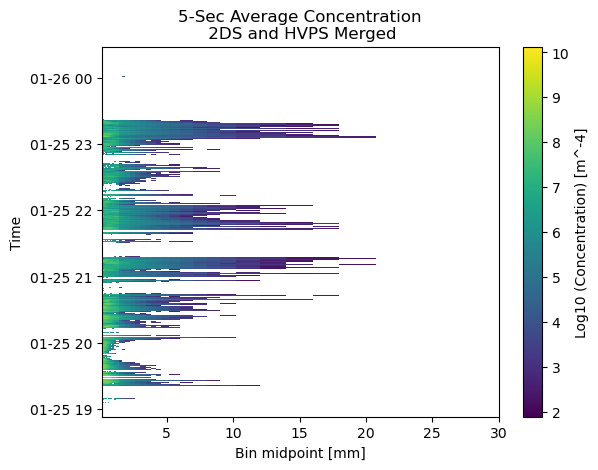

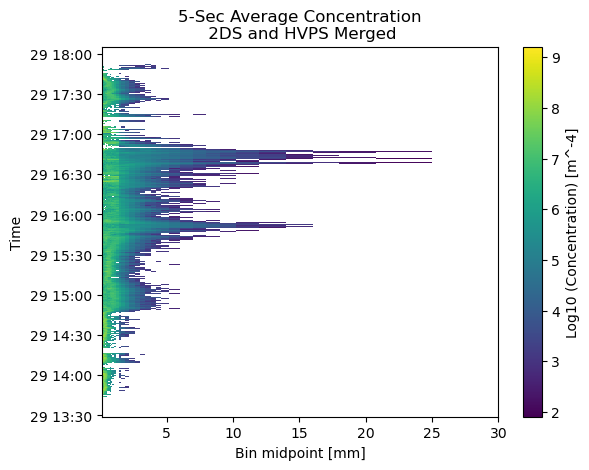

In [9]:
plt.figure()
plt.pcolormesh(PSD_ds.Average_CONC.binmid/10**3, PSD_ds.Time, np.log10(PSD_ds.Average_CONC), cmap='viridis')
plt.colorbar(label='Log10 (Concentration) [m^-4]')
plt.xlabel('Bin midpoint [mm]')
plt.ylabel('Time')
plt.title('5-Sec Average Concentration\n 2DS and HVPS Merged')

plt.figure()
plt.pcolormesh(PSD_ds2.Average_CONC.binmid/10**3, PSD_ds2.Time, np.log10(PSD_ds2.Average_CONC), cmap='viridis')
plt.colorbar(label='Log10 (Concentration) [m^-4]')
plt.xlabel('Bin midpoint [mm]')
plt.ylabel('Time')
plt.title('5-Sec Average Concentration\n 2DS and HVPS Merged')

Text(0.5, 1.0, '5-Sec Average Aspect Ratio\n 2DS and HVPS Merged')

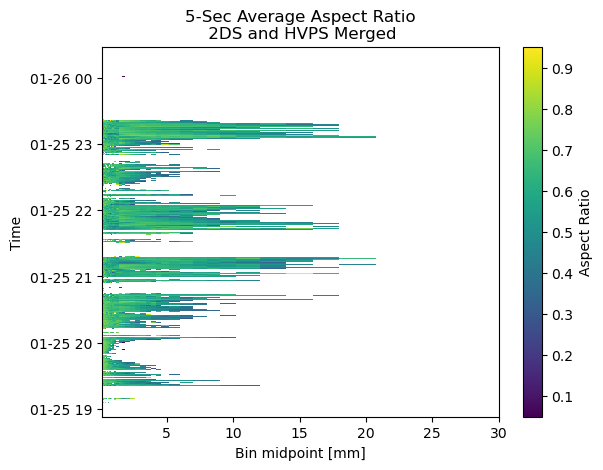

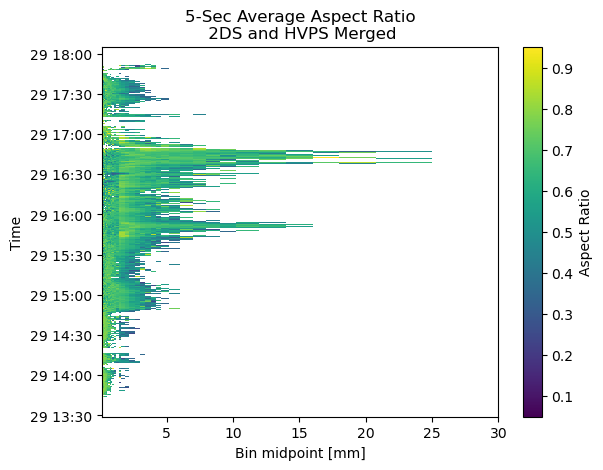

In [10]:
plt.figure()
plt.pcolormesh(PSD_ds.Average_ASPECTRATIO.binmid/10**3, PSD_ds.Time, PSD_ds.Average_ASPECTRATIO.values, cmap='viridis')
plt.colorbar(label='Aspect Ratio')
plt.xlabel('Bin midpoint [mm]')
plt.ylabel('Time')
plt.title('5-Sec Average Aspect Ratio\n 2DS and HVPS Merged')

plt.figure()
plt.pcolormesh(PSD_ds2.Average_ASPECTRATIO.binmid/10**3, PSD_ds2.Time, PSD_ds2.Average_ASPECTRATIO.values, cmap='viridis')
plt.colorbar(label='Aspect Ratio')
plt.xlabel('Bin midpoint [mm]')
plt.ylabel('Time')
plt.title('5-Sec Average Aspect Ratio\n 2DS and HVPS Merged')

In [11]:
# Compute relevant microphysical quantities
def mp_calcs(ND,D,dD,ar,a,b, mD, source):
    """
    INPUT UNITS:
    ND MUST BE IN CM^-4
    D IN CM
    dD IN CM
    mD in kg
    
    INPUT SHAPES:
    ND: n_samples,n_bins
    D: n_bins
    dD: n_bins 
    
    OUTPUT UNITS:
    Dm: m
    Dm_liquid: m
    IWC: g/m^3
    Nt: #/m^3 
    rho: g/cm^3
    V: cm^3/cm^3
    Nw: m^-4?
    """

    if source=='obs':
        n_samples = ND.shape[0]
        n_bins = ND.shape[1]
        #tile D and dD to match ND
        D = np.reshape(D,[1,n_bins])
        D = np.tile(D,(n_samples,1))
        dD = np.reshape(dD,[1,n_bins])
        dD = np.tile(dD,(n_samples,1))

        mass_particle=a*D**b

    if source=='chosen':
        mass_particle=mD*1000 #[g]
    
    #get Nt
    M0 = np.nansum(ND*dD,axis=1)
    #get IWC 
    M3 = np.nansum((mass_particle)*(ND*dD),axis=1)
    #get top of Dm 
    M4 = np.nansum((mass_particle)*(D*ND*dD),axis=1)
    
    #get Dm 
    Dm = M4/M3 
    
    #get_total_spherical_volume 
    # V = np.nansum((np.pi/6.)*D**3*(ND*dD),axis=1)
    V = np.nansum((np.pi/6.)*(ND*dD)*ar*D**3,axis=1)
    
    #get effective density 
    rhoe = M3/V

    #get Nw
    D_melt = ((6. * mass_particle) / (np.pi * 0.997))**(1./3.)
    Nw = (4.**4 / 6) * np.nansum(D_melt**3 * ND * dD, axis=1)**5 / np.nansum(D_melt**4 * ND * dD, axis=1)**4
    Nw=Nw*1e8 # cm^-4 to m^-4

    # Get Dm_liquid
    # M3_liq= np.nansum(D_melt**3.*ND*dD,axis=1)
    # M4_liq = np.nansum(D_melt**4.*ND*dD,axis=1)
    M3_liq= np.nansum((mass_particle)*ND*dD,axis=1)
    M4_liq = np.nansum((mass_particle)*D_melt*ND*dD,axis=1)
    Dm_liquid = M4_liq/M3_liq

    Nt = M0*1e6 # number/cm^3 to number/m^3
    IWC = M3*1e6 # convert from g/cm^3 to g/m^3
    Dm = Dm/100 #convert from cm to m
    V = V #cm^3/cm^3 
    # rhoe = rhoe*1e6 #g/m^3
    Dm_liquid = Dm_liquid/100
    
    return Dm,Dm_liquid,IWC,Nt,Nw,rhoe,V

In [12]:
# Calculating microphysics quantities that were retreieved from the ML model
# Heymsfield 2004, D must be in cm   (its in cgs)
a = 0.0061
b = 2.05
#Leinonen and S. 2015
a_L15 = np.array([0.015, 0.0354, 0.0545, 0.126, 0.369, 1.7])
b_L15 = np.array([2.08, 2.06, 2.05, 2.03, 2.11, 2.3])
a_L15 = (10.**(3-2*b_L15)) * a_L15

Dm_HY,Dm_liquid_HY,IWC_HY,Nt,Nw_HY,Rho_HY,V = mp_calcs(PSD_ds.Average_CONC.values*1e-8,
                                                       PSD_ds.binmid.values*1e-4,
                                                       PSD_ds.bin_width.values*1e-4,
                                                       PSD_ds.Average_ASPECTRATIO.values,
                                                       a,b,0, 'obs')

Dm_HY2,Dm_liquid_HY2,IWC_HY2,Nt2,Nw_HY2,Rho_HY2,V2 = mp_calcs(PSD_ds2.Average_CONC.values*1e-8,
                                                       PSD_ds2.binmid.values*1e-4,
                                                       PSD_ds2.bin_width.values*1e-4,
                                                       PSD_ds2.Average_ASPECTRATIO.values,
                                                       a,b,0, 'obs')

# #Leinonen and S. 2015 a,b values
# Dm_L15 = np.zeros([mp_fl.Time.shape[0],len(a_L15)])
# Dm_liquid_L15 = np.zeros([mp_fl.Time.shape[0],len(a_L15)])
# IWC_L15 = np.zeros([mp_fl.Time.shape[0],len(a_L15)])
# Nw_L15 = np.zeros([mp_fl.Time.shape[0],len(a_L15)])
# Rho_L15 = np.zeros([mp_fl.Time.shape[0],len(a_L15)])
# for i in np.arange(len(a_L15)):
#     Dm_L15[:,i],Dm_liquid_L15[:,i],IWC_L15[:,i],_,Nw_L15[:,i],Rho_L15[:,i],_ = mp_calcs(mp_fl.ND.values.T*1e-8,MD*1e-4,DD*1e-4,a_L15[i],b_L15[i], 0, 'obs')

# IWC_HY_corr=np.copy(IWC_HY)
# IWC_HY_corr[np.where(IWC_HY==0)[0]]=np.NaN

# calc_mp_df=pd.DataFrame([Dm_HY, Dm_liquid_HY, np.log10(Nw_HY)-3, IWC_HY_corr, mp_fl.Temp.values, mp_fl.Lat.values, mp_fl.Lon.values, mp_fl.Alt.values], columns=mp_fl.Time.values, 
#                         index=['Dm Solid','Dm Liquid','Nw','IWC','Temp','Lat','Lon','Alt']).T
# calc_mp_df_ls.append(calc_mp_df)

/tmp/ipykernel_333610/803787298.py:47: RuntimeWarning: invalid value encountered in divide
  Dm = M4/M3
/tmp/ipykernel_333610/803787298.py:54: RuntimeWarning: invalid value encountered in divide
  rhoe = M3/V
/tmp/ipykernel_333610/803787298.py:58: RuntimeWarning: invalid value encountered in divide
  Nw = (4.**4 / 6) * np.nansum(D_melt**3 * ND * dD, axis=1)**5 / np.nansum(D_melt**4 * ND * dD, axis=1)**4
/tmp/ipykernel_333610/803787298.py:66: RuntimeWarning: invalid value encountered in divide
  Dm_liquid = M4_liq/M3_liq


In [13]:
conc_df = pd.DataFrame(PSD_ds.Average_CONC.values, columns = PSD_ds.binmid.values)
conc_df['Time'] = PSD_ds.Time
conc_df = conc_df.set_index('Time')

conc_df_nonan = conc_df.dropna(how='any')
print(conc_df_nonan)

conc_df2 = pd.DataFrame(PSD_ds2.Average_CONC.values, columns = PSD_ds2.binmid.values)
conc_df2['Time'] = PSD_ds2.Time
conc_df2 = conc_df2.set_index('Time')

conc_df_nonan2 = conc_df2.dropna(how='any')
conc_df_nonan2

                          112.5         137.5         175.0         225.0    \
Time                                                                          
2020-01-25 19:05:21  5.623446e+07  4.217584e+07  0.000000e+00  0.000000e+00   
2020-01-25 19:05:26  2.669018e+06  2.669018e+06  0.000000e+00  0.000000e+00   
2020-01-25 19:05:31  6.260543e+06  6.001095e+06  7.866285e+06  1.200219e+06   
2020-01-25 19:05:36  5.473627e+08  2.219038e+08  7.766632e+07  4.438076e+07   
2020-01-25 19:05:41  5.217002e+08  1.333670e+08  9.610266e+07  2.941918e+07   
...                           ...           ...           ...           ...   
2020-01-25 23:22:11  8.936142e+06  4.061883e+06  4.061883e+06  6.092824e+06   
2020-01-25 23:22:16  0.000000e+00  5.705663e+06  2.852831e+06  4.754719e+06   
2020-01-25 23:22:21  3.728948e+06  0.000000e+00  0.000000e+00  1.864474e+06   
2020-01-25 23:22:26  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
2020-01-25 23:22:31  0.000000e+00  0.000000e+00  0.0

,112.5,137.5,175.0,225.0,275.0,325.0,375.0,437.5,512.5,587.5,...,7500.0,8500.0,9500.0,11000.0,13000.0,15000.0,17000.0,19000.0,22500.0,27500.0
Time,,,,,,,,,,,,,,,,,,,,,
2023-01-29 13:43:49,0.000000e+00,0.000000e+00,9.819333e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-29 13:43:54,0.000000e+00,1.619934e+06,8.099672e+05,0.000000e+00,8.099672e+05,0.000000e+00,0.000000e+00,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-29 13:43:59,0.000000e+00,0.000000e+00,1.150085e+06,0.000000e+00,0.000000e+00,5.750426e+05,0.000000e+00,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-29 13:44:04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.653562e+06,0.000000e+00,0.000000e+00,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-29 13:44:09,8.549617e+06,8.549617e+06,1.122137e+07,1.175572e+07,2.137404e+06,1.603053e+06,1.068702e+06,356234.041757,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-29 17:51:49,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-29 17:51:54,1.923611e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-29 17:51:59,1.778529e+06,1.778529e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
param_df = pd.DataFrame()
param_df['Dm'] = Dm_HY
param_df['Dm_liq'] = Dm_liquid_HY
param_df['IWC'] = IWC_HY
param_df['Nw'] = Nw_HY
param_df['Rho'] = Rho_HY
param_df['Time'] = PSD_ds.Time
param_df['Stability'] = np.ones(Dm_HY.shape)
param_df = param_df.set_index('Time')
param_df_nonan = param_df.dropna(how='any')
param_df_nonan

,Dm,Dm_liq,IWC,Nw,Rho,Stability
Time,,,,,,
2020-01-25 19:05:21,0.000415,0.000254,0.018956,3.737674e+08,0.311114,1.0
2020-01-25 19:05:26,0.000764,0.000389,0.012387,4.424304e+07,0.168944,1.0
2020-01-25 19:05:31,0.000171,0.000140,0.000990,2.079755e+08,0.687958,1.0
2020-01-25 19:05:36,0.000255,0.000177,0.034729,2.904356e+09,0.518487,1.0
2020-01-25 19:05:41,0.000167,0.000137,0.024283,5.653909e+09,0.704767,1.0
...,...,...,...,...,...,...
2020-01-25 23:41:36,0.002000,0.000756,0.000431,1.082189e+05,1.074936,1.0
2020-01-25 23:41:56,0.002000,0.000756,0.000427,1.071870e+05,1.074936,1.0
2020-01-25 23:45:21,0.001500,0.000621,0.000238,1.312717e+05,1.412780,1.0


In [21]:
param_df2 = pd.DataFrame()
param_df2['Dm'] = Dm_HY2
param_df2['Dm_liq'] = Dm_liquid_HY2
param_df2['IWC'] = IWC_HY2
param_df2['Nw'] = Nw_HY2
param_df2['Rho'] = Rho_HY2
param_df2['Time'] = PSD_ds2.Time
param_df2['Stability'] = np.zeros(Dm_HY2.shape)
param_df2 = param_df2.set_index('Time')
param_df_nonan2 = param_df2.dropna(how='any')
param_df_nonan2

,Dm,Dm_liq,IWC,Nw,Rho,Stability
Time,,,,,,
2023-01-29 13:43:49,0.000175,0.000143,0.000749,1.465051e+08,0.836627,0.0
2023-01-29 13:43:54,0.000231,0.000171,0.000256,2.421618e+07,0.692436,0.0
2023-01-29 13:43:59,0.000271,0.000191,0.000244,1.491920e+07,0.613899,0.0
2023-01-29 13:44:04,0.000275,0.000195,0.000319,1.811575e+07,0.471959,0.0
2023-01-29 13:44:09,0.000250,0.000180,0.004191,3.243874e+08,0.557421,0.0
...,...,...,...,...,...,...
2023-01-29 17:51:54,0.003069,0.001005,0.001571,1.260445e+05,0.085212,0.0
2023-01-29 17:51:59,0.003467,0.001090,0.001796,1.039401e+05,0.058021,0.0
2023-01-29 17:52:04,0.002496,0.000857,0.001172,1.774947e+05,0.067214,0.0


In [24]:
param_tog = pd.concat([param_df_nonan, param_df_nonan2])
param_tog

,Dm,Dm_liq,IWC,Nw,Rho,Stability
Time,,,,,,
2020-01-25 19:05:21,0.000415,0.000254,0.018956,3.737674e+08,0.311114,1.0
2020-01-25 19:05:26,0.000764,0.000389,0.012387,4.424304e+07,0.168944,1.0
2020-01-25 19:05:31,0.000171,0.000140,0.000990,2.079755e+08,0.687958,1.0
2020-01-25 19:05:36,0.000255,0.000177,0.034729,2.904356e+09,0.518487,1.0
2020-01-25 19:05:41,0.000167,0.000137,0.024283,5.653909e+09,0.704767,1.0
...,...,...,...,...,...,...
2023-01-29 17:51:54,0.003069,0.001005,0.001571,1.260445e+05,0.085212,0.0
2023-01-29 17:51:59,0.003467,0.001090,0.001796,1.039401e+05,0.058021,0.0
2023-01-29 17:52:04,0.002496,0.000857,0.001172,1.774947e+05,0.067214,0.0


In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
param_tog[['Dm_T', 'Dm_liq_T', 'IWC_T', 'Nw_T', 'Rho_T']] = scaler.fit_transform(param_tog[['Dm', 'Dm_liq', 'IWC', 'Nw', 'Rho']])

In [26]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score

In [27]:
def get_kmeans_score(df, center):
    '''
    returns the elbow inertial index, the Davies Bouldin and Silhouette score
    INPUT:
        data - the dataset you want to fit kmeans to
        center - the number of centers you want (the k value)
    OUTPUT:
        elbow inertial index, the Davies Bouldin and Silhouette score
    '''
    kmeans = KMeans(n_clusters=center, random_state=10)
    model = kmeans.fit(df)
    model2 = kmeans.fit_predict(df)
    cluster_labels = model.labels_
    
    dav = davies_bouldin_score(df, model2)
    sil = silhouette_score(df, cluster_labels)
    elbow = model.inertia_
    return dav, sil, elbow

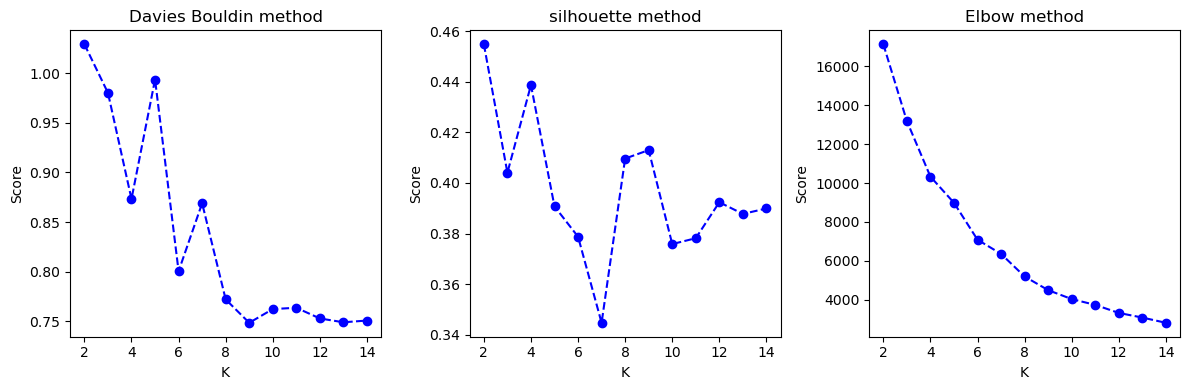

In [28]:
dav = []
sil = []
elbow = []

for k in range(2,15):
    _dav, _sil, _el = get_kmeans_score(param_tog[['Dm_T', 'Dm_liq_T', 'IWC_T', 'Nw_T', 'Rho_T']], k)
    dav.append(_dav)
    sil.append(_sil)
    elbow.append(_el)

centers = range(2,15)
fig, (ax, ax1, ax2) = plt.subplots(1, 3, figsize=(12, 4), dpi=100)
ax.plot(centers, dav, linestyle='--', marker='o', color='b');
ax.set_xlabel('K');
ax.set_ylabel('Score');
ax.set_title('Davies Bouldin method');

ax1.plot(centers, sil, linestyle='--', marker='o', color='b');
ax1.set_xlabel('K');
ax1.set_ylabel('Score');
ax1.set_title('silhouette method');

ax2.plot(centers, elbow, linestyle='--', marker='o', color='b');
ax2.set_xlabel('K');
ax2.set_ylabel('Score');
ax2.set_title('Elbow method');
fig.tight_layout()

In [29]:
nclusters = 9

In [31]:
kmeans = KMeans(n_clusters= nclusters, random_state=10)
kmeans.fit(param_tog[['Dm_T', 'Dm_liq_T', 'IWC_T', 'Nw_T', 'Rho_T']])

,n_clusters,9
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,10
,copy_x,True
,algorithm,'lloyd'


In [33]:
kmean_cat_df = pd.DataFrame(kmeans.labels_, columns = ['Group'])
kmean_cat_df['Time'] = param_tog.index
kmean_cat_df = kmean_cat_df.set_index('Time')
kmean_cat_df

,Group
Time,
2020-01-25 19:05:21,2
2020-01-25 19:05:26,0
2020-01-25 19:05:31,2
2020-01-25 19:05:36,2
2020-01-25 19:05:41,3
...,...
2023-01-29 17:51:54,6
2023-01-29 17:51:59,6
2023-01-29 17:52:04,6


In [35]:
param_tog['Kmean_group'] = kmean_cat_df['Group']
param_tog

,Dm,Dm_liq,IWC,Nw,Rho,Stability,Dm_T,Dm_liq_T,IWC_T,Nw_T,Rho_T,Kmean_group
Time,,,,,,,,,,,,
2020-01-25 19:05:21,0.000415,0.000254,0.018956,3.737674e+08,0.311114,1.0,-0.824318,-0.978191,-0.741380,-0.305541,0.760991,2
2020-01-25 19:05:26,0.000764,0.000389,0.012387,4.424304e+07,0.168944,1.0,-0.533719,-0.514233,-0.750119,-0.450028,-0.165911,0
2020-01-25 19:05:31,0.000171,0.000140,0.000990,2.079755e+08,0.687958,1.0,-1.027075,-1.367022,-0.765279,-0.378236,3.217887,2
2020-01-25 19:05:36,0.000255,0.000177,0.034729,2.904356e+09,0.518487,1.0,-0.957849,-1.242184,-0.720398,0.804045,2.112992,2
2020-01-25 19:05:41,0.000167,0.000137,0.024283,5.653909e+09,0.704767,1.0,-1.030908,-1.379218,-0.734293,2.009640,3.327477,3
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-29 17:51:54,0.003069,0.001005,0.001571,1.260445e+05,0.085212,0.0,1.385037,1.599003,-0.764505,-0.469371,-0.711817,6
2023-01-29 17:51:59,0.003467,0.001090,0.001796,1.039401e+05,0.058021,0.0,1.716230,1.892099,-0.764206,-0.469381,-0.889095,6
2023-01-29 17:52:04,0.002496,0.000857,0.001172,1.774947e+05,0.067214,0.0,0.907629,1.092535,-0.765036,-0.469349,-0.829160,6


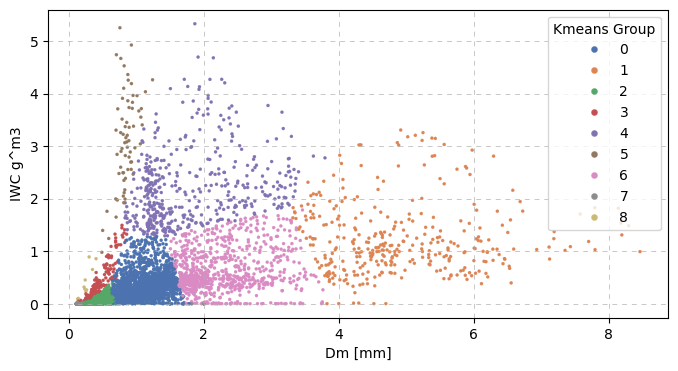

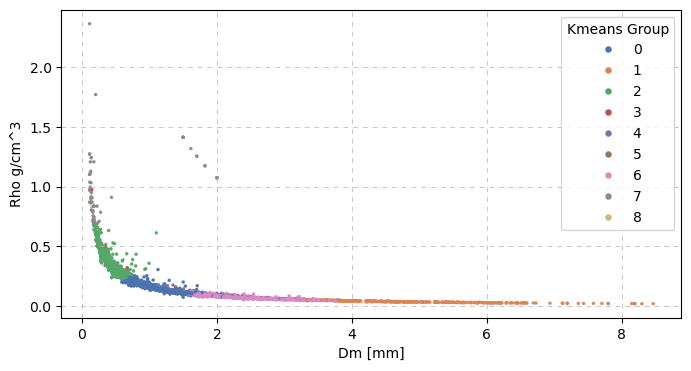

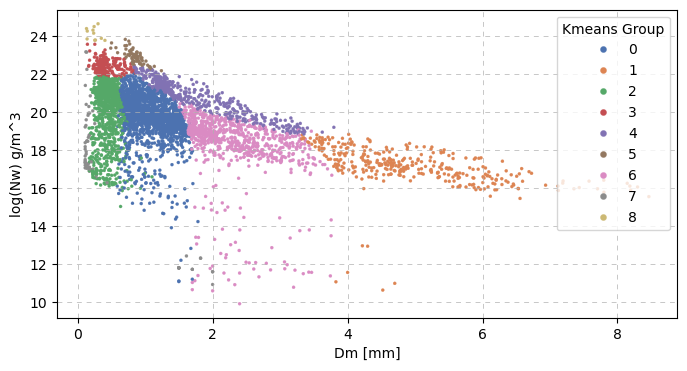

In [36]:
# Plotting results 
fig, ax = plt.subplots(figsize=(8,4))
sns.scatterplot(data=param_tog, x=param_tog['Dm']*1000, y=param_tog['IWC'], hue=param_tog['Kmean_group'], s=5,
                     ax=ax,palette=sns.color_palette('deep', nclusters), 
                     legend=True, edgecolor=None)
ax.set_xlabel('Dm [mm]')
ax.set_ylabel('IWC g^m3')
ax.grid('both', linestyle='--', lw=0.5, dashes=[7,7])
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles=handles, labels=labels, title='Kmeans Group',markerscale=2)

# Plotting results 
fig, ax = plt.subplots(figsize=(8,4))
sns.scatterplot(data=param_tog, x=param_tog['Dm']*1000, y=param_tog['Rho'], hue=param_tog['Kmean_group'], s=5,
                     ax=ax,palette=sns.color_palette('deep', nclusters), 
                     legend=True, edgecolor=None)
ax.set_xlabel('Dm [mm]')
ax.set_ylabel('Rho g/cm^3')
ax.grid('both', linestyle='--', lw=0.5, dashes=[7,7])
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles=handles, labels=labels, title='Kmeans Group',markerscale=2)

# Plotting results 
fig, ax = plt.subplots(figsize=(8,4))
sns.scatterplot(data=param_tog, x=param_tog['Dm']*1000, y=np.log(param_tog['Nw']), hue=param_tog['Kmean_group'], s=5,
                     ax=ax,palette=sns.color_palette('deep', nclusters), 
                     legend=True, edgecolor=None)
ax.set_xlabel('Dm [mm]')
ax.set_ylabel('log(Nw) g/m^3')
ax.grid('both', linestyle='--', lw=0.5, dashes=[7,7])
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles=handles, labels=labels, title='Kmeans Group',markerscale=2)

In [41]:
epi_grouped = param_tog.iloc[np.where(param_tog['Stability']==1)[0]]
stable_grouped = param_tog.iloc[np.where(param_tog['Stability']==0)[0]]

In [42]:
epi_grouped

,Dm,Dm_liq,IWC,Nw,Rho,Stability,Dm_T,Dm_liq_T,IWC_T,Nw_T,Rho_T,Kmean_group
Time,,,,,,,,,,,,
2020-01-25 19:05:21,0.000415,0.000254,0.018956,3.737674e+08,0.311114,1.0,-0.824318,-0.978191,-0.741380,-0.305541,0.760991,2
2020-01-25 19:05:26,0.000764,0.000389,0.012387,4.424304e+07,0.168944,1.0,-0.533719,-0.514233,-0.750119,-0.450028,-0.165911,0
2020-01-25 19:05:31,0.000171,0.000140,0.000990,2.079755e+08,0.687958,1.0,-1.027075,-1.367022,-0.765279,-0.378236,3.217887,2
2020-01-25 19:05:36,0.000255,0.000177,0.034729,2.904356e+09,0.518487,1.0,-0.957849,-1.242184,-0.720398,0.804045,2.112992,2
2020-01-25 19:05:41,0.000167,0.000137,0.024283,5.653909e+09,0.704767,1.0,-1.030908,-1.379218,-0.734293,2.009640,3.327477,3
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-25 23:41:36,0.002000,0.000756,0.000431,1.082189e+05,1.074936,1.0,0.495117,0.743822,-0.766022,-0.469379,5.740860,7
2020-01-25 23:41:56,0.002000,0.000756,0.000427,1.071870e+05,1.074936,1.0,0.495117,0.743822,-0.766027,-0.469380,5.740860,7
2020-01-25 23:45:21,0.001500,0.000621,0.000238,1.312717e+05,1.412780,1.0,0.078909,0.281098,-0.766278,-0.469369,7.943489,7


In [47]:
bins = np.arange(0, nclusters+1,1)
bins

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

([<matplotlib.axis.XTick at 0x14ebf37f7890>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9')])

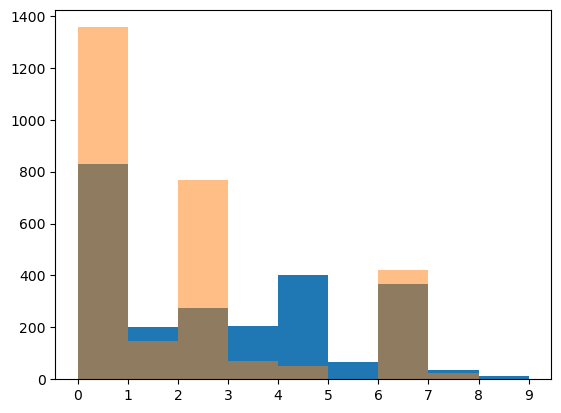

In [50]:
plt.hist(epi_grouped['Kmean_group'], bins=bins)
plt.hist(stable_grouped['Kmean_group'], bins=bins, alpha=.5)
plt.xticks(bins)

- Stable Groups: 0,2,6
- EPI Groups: 0, 4, 6
    - Unique: 1, 3, 5,8

In [51]:
# sel_times = param_df_nonan.index.values[np.where(param_df_nonan['Kmean_group']==0)[0]]
# # sel_times

# sel_PSDs = PSD_ds.sel(Time = sel_times)

# plt.figure()
# for n in range(sel_PSDs.Time.shape[0]):
#     plt.step(sel_PSDs.binmid.values*10**-3, (sel_PSDs.Average_CONC.values[n,:])*(sel_PSDs.binmid.values*10**-6))
#     plt.yscale('log')
#     plt.ylabel('Concentration [#/m^-3]')
#     plt.xlabel('Diameter [mm]')
#     plt.title('Normalized PSD for Kmeans Group 0')

# avg_PSD_grp = sel_PSDs.median(dim='Time')

# plt.figure()
# plt.step(sel_PSDs.binmid.values*10**-3,avg_PSD_grp.Average_CONC.values*(sel_PSDs.binmid.values*10**-6))
# plt.yscale('log')
# plt.ylabel('Concentration [#/m^-3]')
# plt.xlabel('Diameter [mm]')
# plt.title('Normalized PSD Averge for all PSDs in Kmeans Group 0')

In [52]:
# sel_times = param_df_nonan.index.values[np.where(param_df_nonan['Kmean_group']==1)[0]]
# # sel_times

# sel_PSDs = PSD_ds.sel(Time = sel_times)

# plt.figure()
# for n in range(sel_PSDs.Time.shape[0]):
#     plt.step(sel_PSDs.binmid.values*10**-3, (sel_PSDs.Average_CONC.values[n,:])*(sel_PSDs.binmid.values*10**-6))
#     plt.yscale('log')
#     plt.ylabel('Concentration [#/m^-3]')
#     plt.xlabel('Diameter [mm]')
#     plt.title('Normalized PSD for Kmeans Group 1')

# avg_PSD_grp = sel_PSDs.median(dim='Time')

# plt.figure()
# plt.step(sel_PSDs.binmid.values*10**-3,avg_PSD_grp.Average_CONC.values*(sel_PSDs.binmid.values*10**-6))
# plt.yscale('log')
# plt.ylabel('Concentration [#/m^-3]')
# plt.xlabel('Diameter [mm]')
# plt.title('Normalized PSD Averge for all PSDs in Kmeans Group 1')

In [53]:
grouped_data_ls_EPI = []
avg_conc_ls_EPI = []
for n in range(nclusters):
    sel_times = param_df_nonan.index.values[np.where(epi_grouped['Kmean_group']==n)[0]]
    sel_PSDs = PSD_ds.sel(Time = sel_times)
    grouped_data_ls_EPI.append(sel_PSDs)
    avg_conc_ls_EPI.append(grouped_data_ls_EPI[n].Average_CONC.median(dim='Time'))

grouped_data_ls_stable = []
avg_conc_ls_stable = []
for n in range(nclusters):
    sel_times = param_df_nonan2.index.values[np.where(stable_grouped['Kmean_group']==n)[0]]
    sel_PSDs = PSD_ds2.sel(Time = sel_times)
    grouped_data_ls_stable.append(sel_PSDs)
    avg_conc_ls_stable.append(grouped_data_ls_stable[n].Average_CONC.median(dim='Time'))

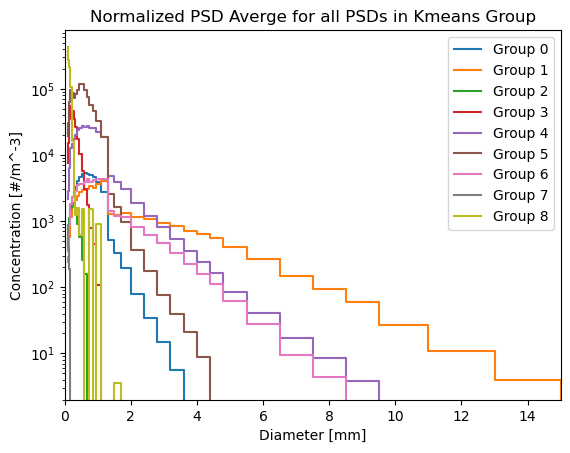

In [54]:
labels = ['Group 0', 'Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5', 'Group 6', 'Group 7', 'Group 8']
for n in range(nclusters):
    plt.step(PSD_ds.binmid.values*10**-3,avg_conc_ls_EPI[n].values*(PSD_ds.binmid.values*10**-6), label=labels[n])
    plt.yscale('log')
    plt.xlim(0,15)
    plt.legend()
    plt.ylabel('Concentration [#/m^-3]')
    plt.xlabel('Diameter [mm]')
    plt.title('Normalized PSD Averge for all PSDs in Kmeans Group')

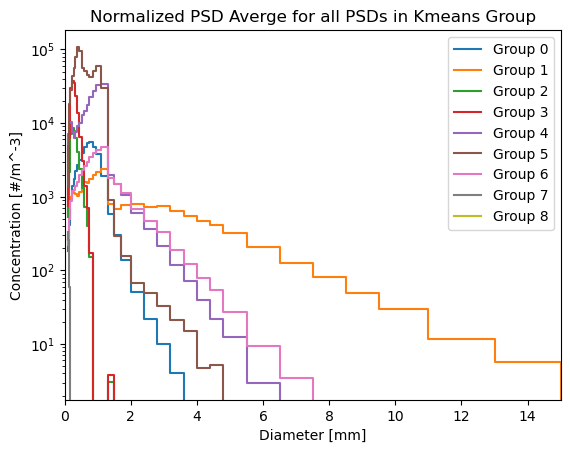

In [55]:
labels = ['Group 0', 'Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5', 'Group 6', 'Group 7', 'Group 8']
for n in range(nclusters):
    plt.step(PSD_ds.binmid.values*10**-3,avg_conc_ls_stable[n].values*(PSD_ds.binmid.values*10**-6), label=labels[n])
    plt.yscale('log')
    plt.xlim(0,15)
    plt.legend()
    plt.ylabel('Concentration [#/m^-3]')
    plt.xlabel('Diameter [mm]')
    plt.title('Normalized PSD Averge for all PSDs in Kmeans Group')

# Matching Radar Data to PSDs

In [87]:
def er2read_gen(er2file, beam='nadir', atten_file=None, max_roll=None, dbz_sigma=None, ldr_sigma=None, vel_sigma=None, 
            width_sigma=None,dbz_min=None, ldr_min=None, vel_min=None, width_min=None, ldr_ml=None):
    '''
    Parses ER-2 radar data and performs QC as requested.
    INPUTS:
        er2file: Path to the ER-2 radar dataset
        beam: 'nadir' or 'scanning' (currently only supports nadir beam data)
        atten_file: None or path to file containing gridded attenuation due to atmospheric gases
        max_roll: None or float value where data masked above threshold [deg]
        dbz_sigma: None or float value where data masked above threshold using a Gaussian filter
        ldr_sigma: None or float value where data masked above threshold using a Gaussian filter
        vel_sigma: None or float value where data masked above threshold using a Gaussian filter
        width_sigma: None or float value where data masked above threshold using a Gaussian filter
        dbz_min: None or float value where data masked below threshold [dBZ]
        ldr_min: None or float value where data masked below threshold [dB]
        vel_min: None or float value where data masked below threshold [m/s]
        width_min: None or float value where data masked below threshold [m/s]
    OUTPUTS:
        er2rad: Dictionary object with select navigation and radar variables
    '''

    er2rad = {}
    hdf = h5py.File(er2file, 'r')

    radname = hdf['Information']['RadarName'][0].decode('UTF-8')

    # Aircraft nav information
    alt_plane = hdf['Navigation']['Data']['Height'][:]
    lat = hdf['Navigation']['Data']['Latitude'][:]
    lon = hdf['Navigation']['Data']['Longitude'][:]
    heading = hdf['Navigation']['Data']['Heading'][:] # deg from north (==0 for northward, ==90 for eastward, ==-90 for westward)
    roll = hdf['Navigation']['Data']['Roll'][:]
    pitch = hdf['Navigation']['Data']['Pitch'][:]
    drift = hdf['Navigation']['Data']['Drift'][:]
    nomdist = hdf['Navigation']['Data']['NominalDistance'][:]

    # Time information
    time_raw = hdf['Time']['Data']['TimeUTC'][:]
    time_dt = [datetime(1970, 1, 1)+timedelta(seconds=time_raw[i]) for i in range(len(time_raw))] # Python datetime object
    time_dt64 = np.array(time_dt, dtype='datetime64[ms]') # Numpy datetime64 object (e.g., for plotting)

    # Radar information
    rg = hdf['Products']['Information']['Range'][:]
    if radname=='CRS':
        radar_dbz = hdf['Products']['Data']['dBZe'][:].T
        radar_ldr = hdf['Products']['Data']['LDR'][:].T
        radar_vel = hdf['Products']['Data']['Velocity_corrected'][:].T
        radar_width = hdf['Products']['Data']['SpectrumWidth'][:].T
        if atten_file is not None: # Correct for 2-way path integrated attenuation
            print('Correcting for attenuation at W-band due to atmospheric gases and LWC.')
            atten_data = xr.open_dataset(atten_file)
            radar_dbz = radar_dbz + atten_data['k_w'].values + atten_data['k_w_liquid'].values
    elif radname=='HIWRAP':
        radar_dbz = hdf['Products']['Ku']['Combined']['Data']['dBZe'][:].T
        radar_ldr = hdf['Products']['Ku']['Combined']['Data']['LDR'][:].T
        radar_vel = hdf['Products']['Ku']['Combined']['Data']['Velocity_corrected'][:].T
        radar_width = hdf['Products']['Ku']['Combined']['Data']['SpectrumWidth'][:].T
        radar2_dbz = hdf['Products']['Ka']['Combined']['Data']['dBZe'][:].T
        radar2_ldr = hdf['Products']['Ka']['Combined']['Data']['LDR'][:].T
        radar2_vel = hdf['Products']['Ka']['Combined']['Data']['Velocity_corrected'][:].T
        radar2_width = hdf['Products']['Ka']['Combined']['Data']['SpectrumWidth'][:].T
        if atten_file is not None: # Correct for 2-way path integrated attenuation
            print('Correcting for attenuation at Ka- and Ku-band due to atmospheric gases.')
            atten_data = xr.open_dataset(atten_file)
            radar_dbz = radar_dbz + atten_data['k_ku'].values
            radar2_dbz = radar2_dbz + atten_data['k_ka'].values
    elif radname=='EXRAD':
        radar_dbz = hdf['Products']['Data']['dBZe'][:].T
        radar_ldr = -999. * np.ones(radar_dbz.shape) # dummy values as variable does not exist
        if 'Velocity_corrected' in list(hdf['Products']['Data'].keys()):
            radar_vel = hdf['Products']['Data']['Velocity_corrected'][:].T # for NUBF correction
        else:
            radar_vel = hdf['Products']['Data']['Velocity'][:].T
        radar_width = np.ma.masked_invalid(hdf['Products']['Data']['SpectrumWidth'][:].T)
        if atten_file is not None: # Correct for 2-way path integrated attenuation
            print('Correcting for attenuation at X-band due to atmospheric gases.')
            atten_data = xr.open_dataset(atten_file)
            radar_dbz = radar_dbz + atten_data['k_x'].values
    else:
        print('Error: Unsupported radar')

    # Make some 1D variables 2D
    time2d = np.tile(time_dt64[np.newaxis, :], (len(rg), 1))
    [alt2d_plane, rg2d] = np.meshgrid(alt_plane, rg)
    alt_gate = alt2d_plane - rg2d # compute the altitude of each gate
    lat2d = np.tile(lat[np.newaxis, :], (len(rg), 1))
    lon2d = np.tile(lon[np.newaxis, :], (len(rg), 1))
    roll2d = np.tile(roll[np.newaxis, :], (len(rg), 1))

    # === QC data if user specifies it ===
    # Remove if aircraft roll exceeds 10 deg
    if max_roll is not None:
        radar_dbz = np.ma.masked_where(np.abs(roll2d) > max_roll, radar_dbz)
        radar_ldr = np.ma.masked_where(np.abs(roll2d) > max_roll, radar_ldr)
        radar_vel = np.ma.masked_where(np.abs(roll2d) > max_roll, radar_vel)
        radar_width = np.ma.masked_where(np.abs(roll2d) > max_roll, radar_width)
        if radname=='HIWRAP': # Ka-band
            radar2_dbz = np.ma.masked_where(np.abs(roll2d) > max_roll, radar2_dbz)
            radar2_ldr = np.ma.masked_where(np.abs(roll2d) > max_roll, radar2_ldr)
            radar2_vel = np.ma.masked_where(np.abs(roll2d) > max_roll, radar2_vel)
            radar2_width = np.ma.masked_where(np.abs(roll2d) > max_roll, radar2_width)

    # Remove if below a specified value/threshold
    if dbz_min is not None:
        radar_dbz = np.ma.masked_where(radar_dbz < dbz_min, radar_dbz)
        if radname=='HIWRAP': # Ka-band
            radar2_dbz = np.ma.masked_where(radar2_dbz < dbz_min, radar2_dbz)
    if ldr_min is not None:
        radar_ldr = np.ma.masked_where(radar_ldr < ldr_min, radar_ldr)
        if radname=='HIWRAP': # Ka-band
            radar2_ldr = np.ma.masked_where(radar2_ldr < ldr_min, radar2_ldr)
    if vel_min is not None:
        radar_vel = np.ma.masked_where(radar_vel < vel_min, radar_vel)
        if radname=='HIWRAP': # Ka-band
            radar2_vel = np.ma.masked_where(radar2_vel < vel_min, radar2_vel)
    if width_min is not None:
        radar_width = np.ma.masked_where(radar_width < width_min, radar_width)
        if radname=='HIWRAP': # Ka-band
            radar2_width = np.ma.masked_where(radar2_width < width_min, radar2_width)

    # Despeckle
    if dbz_sigma is not None:
        radar_dbz = despeckle(radar_dbz, dbz_sigma)
        if radname=='HIWRAP': # Ka-band
            radar2_dbz = despeckle(radar2_dbz, dbz_sigma)
    if ldr_sigma is not None:
        radar_ldr = despeckle(radar_ldr, ldr_sigma)
        if radname=='HIWRAP': # Ka-band
            radar2_ldr = despeckle(radar2_ldr, ldr_sigma)
    if vel_sigma is not None:
        radar_vel = despeckle(radar_vel, vel_sigma)
        if radname=='HIWRAP': # Ka-band
            radar2_vel = despeckle(radar2_vel, vel_sigma)
    if width_sigma is not None:
        radar_width = despeckle(radar_width, width_sigma)
        if radname=='HIWRAP': # Ka-band
            radar2_width = despeckle(radar2_width, width_sigma)

    if ldr_ml is not None:
        ml_dbz=radar_dbz.copy()
        ml_idx=np.where((radar_ldr>ldr_ml) & (alt_gate<3000))
        ml_idx_df=pd.DataFrame(ml_idx).T.groupby(1, as_index=True).min()
        for n in range(ml_idx_df[0].shape[0]):
            ml_dbz[ml_idx_df.iloc[n].values[0]:,ml_idx_df.index.values[n]]=np.NaN
        if radname=='HIWRAP':
            ml_dbz2=radar2_dbz.copy()
            for n in range(ml_idx_df[0].shape[0]):
                ml_dbz2[ml_idx_df.iloc[n].values[0]:,ml_idx_df.index.values[n]]=np.NaN

    # Assign values to the dictionary
    er2rad['time'] = time_dt64
    er2rad['time_gate'] = time2d
    er2rad['alt_plane'] = alt_plane
    er2rad['alt_gate'] = alt_gate
    er2rad['lat'] = lat
    er2rad['lon'] = lon
    er2rad['lat_gate'] = lat2d
    er2rad['lon_gate'] = lon2d
    er2rad['heading'] = heading
    er2rad['roll'] = roll
    er2rad['pitch'] = pitch
    er2rad['drift'] = drift
    er2rad['nomdist'] = nomdist
    if radname=='CRS':
        er2rad['dbz_W'] = radar_dbz
        er2rad['ldr_W'] = radar_ldr
        er2rad['vel_W'] = radar_vel
        er2rad['width_W'] = radar_width
    elif radname=='HIWRAP':
        er2rad['dbz_Ka'] = radar2_dbz
        er2rad['ldr_Ka'] = radar2_ldr
        er2rad['vel_Ka'] = radar2_vel
        er2rad['width_Ka'] = radar2_width
        er2rad['dbz_Ku'] = radar_dbz
        er2rad['ldr_Ku'] = radar_ldr
        er2rad['vel_Ku'] = radar_vel
        er2rad['width_Ku'] = radar_width
        if ldr_ml is not None:
            er2rad['ml_dbz_Ku']=ml_dbz
            er2rad['ml_dbz_Ka']=ml_dbz2
    elif radname=='EXRAD':
        er2rad['dbz_X'] = radar_dbz
        er2rad['vel_X'] = radar_vel
        er2rad['width_X'] = radar_width
        
    hdf.close() # close the HDF5 object
        
    return er2rad

In [82]:
def despeckle(er2data, sigma=1.):
    '''
    Mask radar data based on the specified gaussian filter.
    
    Parameters
    ----------
    er2data: radar variable generated by er2read()
    sigma: threshold to use in gaussian filter (default: 1)
    
    Output
    ----------
    er2data: copy of radar variable
    '''
    temp = np.copy(er2data)
    temp_mask = gaussian_filter(temp, sigma)
    temp_mask = np.ma.masked_invalid(temp_mask)
    er2data = np.ma.masked_where(np.ma.getmask(temp_mask), er2data)
    
    return er2data

In [92]:
def melt_lay(radar,dfr_data,ldr_band, starti, stopi, thresh_hgt, thresh, radar2=None, starti2=None, stopi2=None):
    ### Height Filter
    lower_hi=np.copy(radar[ldr_band][:,starti:stopi])
    lower_hi[np.where(radar['alt_gate'][:,starti:stopi]>thresh_hgt)]=np.nan
    
    ### LDR thresh filter
    ml_hgt=[]
    for n in range(lower_hi.shape[1]):
        idx= np.where(lower_hi[:,n]>=thresh)[0]
        if len(idx)!=0:
            #ml_top_idx.append(idx[0])
            ml_hgt.append(radar['alt_gate'][:,starti:stopi][idx[0],n])
        else:
            ml_hgt.append(np.nan)  
    hi_pd=pd.DataFrame(ml_hgt, index=radar['lat'][starti:stopi])
    
    if radar2!=None:
        if hi_pd.index[0]<hi_pd.index[-1]:
            hi_pd_reidx=hi_pd.reindex(hi_pd.index.union(radar2['lat'][starti2:stopi2])).interpolate().drop(hi_pd.index).sort_index()
        if hi_pd.index[0]>hi_pd.index[-1]:
            hi_pd_reidx=hi_pd.reindex(hi_pd.index.union(radar2['lat'][starti2:stopi2])).interpolate().drop(hi_pd.index)[::-1]

    ### Smooth ML heights 
    for n in range(len(hi_pd)-50):
        md_hgt=np.nanmedian(hi_pd.iloc[n:n+50])
        hi_pd.iloc[n+(np.where((md_hgt-hi_pd.iloc[n:n+50])>smooth_flt)[0]),0]=np.nan
        hi_pd.iloc[n+(np.where((hi_pd.iloc[n:n+50]-md_hgt)>smooth_flt)[0]),0]=np.nan
    hi_pd=hi_pd.interpolate('linear')
    
    if radar2!=None:
        for n in range(len(hi_pd_reidx)-50):
            md_hgt=np.nanmedian(hi_pd_reidx.iloc[n:n+50])
            hi_pd_reidx.iloc[n+(np.where((md_hgt-hi_pd_reidx.iloc[n:n+50])>smooth_flt)[0]),0]=np.nan
            hi_pd_reidx.iloc[n+(np.where((hi_pd_reidx.iloc[n:n+50]-md_hgt)>smooth_flt)[0]),0]=np.nan   
        hi_pd_reidx=hi_pd_reidx.interpolate('linear')

    ### Test Plot
    plt.figure(figsize=(10,5))
    plt.pcolormesh(radar['lat'][starti:stopi],radar['alt_gate'][:,starti:stopi]/1000.,lower_hi, cmap='Spectral_r')#,vmin= -3, vmax=3)#, vmin=-3, vmax=3)#,vmin= -40, vmax=0,cmap='Spectral_r')
    plt.plot(hi_pd.index, hi_pd/1000, c='r')
    plt.colorbar(label='ldr')
    plt.title(ldr_band)
    plt.ylim([0,3])
    plt.xticks(radar['lat'][starti:stopi][::30], rotation=90)
    plt.xlabel('Latitude')
    plt.ylabel('Alt, [km]')
    plt.grid(axis='x')
    plt.tight_layout()
    
    ### Masking
    for n in range(radar['dbz_Ku'][:,starti:stopi].shape[1]):
        if np.isnan(hi_pd.iloc[n,0])==False:
            topmli=np.where(radar['alt_gate'][:,starti:stopi][:,n]<hi_pd.iloc[n,0])[0][0]
            radar['dbz_Ku'][:,starti:stopi][topmli::,n]=np.nan
            radar['dbz_Ka'][:,starti:stopi][topmli::,n]=np.nan
            dfr_data[:,starti:stopi][topmli::,n]=np.nan
            radar['ldr_Ku'][:,starti:stopi][topmli::,n]=np.nan
        else:
            continue
        
    if radar2!=None:
        for n in range(radar2['vel_W'][:,starti2:stopi2].shape[1]):
            if np.isnan(hi_pd_reidx.iloc[n,0])!=True:
                topmli=np.where(radar2['alt_gate'][:,starti2:stopi2][:,n]<hi_pd_reidx.iloc[n,0])[0][0]
                radar2['vel_W'][:,starti2:stopi2][topmli::,n]=np.nan
    
    ### Final plots
    plt.figure(figsize=(10,5))
    plt.pcolormesh(radar['lat'][starti:stopi],radar['alt_gate'][:,starti:stopi]/1000.,radar['dbz_Ku'][:,starti:stopi],cmap='Spectral_r')#,vmin= -40, vmax=0,cmap='Spectral_r')
    plt.colorbar(label='dbz')
    plt.ylim([0,12])
    plt.title('Ku-Band')
    plt.xticks(radar['lat'][starti:stopi][::30], rotation=90)
    plt.xlabel('Latitude')
    plt.ylabel('Alt, [km]')
    plt.grid(axis='x')
    plt.tight_layout()
    
    if radar2!=None:
        plt.figure(figsize=(10,5))
        plt.pcolormesh(radar2['lat'][starti2:stopi2],radar2['alt_gate'][:,starti2:stopi2]/1000.,radar2['vel_W'][:,starti2:stopi2],vmin= -3, vmax=3,cmap='seismic')
        plt.plot(hi_pd_reidx.index, hi_pd_reidx/1000, c='r')
        plt.colorbar(label='Vr [m/s]')
        plt.ylim([0,12])
        plt.title('W-Band')
        plt.xticks(radar2['lat'][starti2:stopi2][::30], rotation=90)
        plt.xlabel('Latitude')
        plt.ylabel('Alt, [km]')
        plt.grid(axis='x')
        plt.tight_layout()
    return()

In [124]:
def match_radar_ml(er2obj, p3obj, radname, sphere_size, er2_start, er2_end, p3_start, p3_end, query_k=1,outlier_method=None, return_indices=False, echo_filt=False):
    """ 
    Function to match Radar and ML retrieval to P3 location
    NOTE: the iqr method has an option for echo_filt where you assign how many NaNs in the selected nearby range gates is allowed (helpful to apply retrieval only in regions of radar echo
    """
    # Load P-3 info and trim if needed
    p3_time = p3obj['Time'][:]
    p3_lat = p3obj['nav_lat'][:]
    p3_lon = p3obj['nav_lon'][:]
    p3_alt = p3obj['nav_alt'][:]
    # p3_press= p3obj['nav_press'][:]
    
    start_dt64 = np.datetime64(er2_start)
    end_dt64 = np.datetime64(er2_end)
    
    print('Times:',start_dt64, end_dt64)
    
    # Turn radar spatial data into 1-D arrays
    er2_time = np.ravel(er2obj['time_gate'][:, :])
    er2_x = np.ravel(er2obj['lon_gate'][:, :])
    er2_y = np.ravel(er2obj['lat_gate'][:, :])
    er2_alt = np.ravel(er2obj['alt_gate'][:, :])
    
    # Turn radar data into 1-D arrays
    if radname=='CRS':
        print('CRS')
        radar_dbz = np.ma.ravel(er2obj['dbz_W'][:, :])
        radar_ldr = np.ma.ravel(er2obj['ldr_W'][:, :])
        radar_vel = np.ma.ravel(er2obj['vel_W'][:, :])
        radar_width = np.ma.ravel(er2obj['width_W'][:, :])
    elif radname=='HIWRAP':
        print('HIWRAP')
        radar_dbz = np.ma.ravel(er2obj['dbz_Ku'][:, :])
        radar_ldr = np.ma.ravel(er2obj['ldr_Ku'][:, :])
        radar_vel = np.ma.ravel(er2obj['vel_Ku'][:, :])
        radar_width = np.ma.ravel(er2obj['width_Ku'][:, :])
        radar2_dbz = np.ma.ravel(er2obj['dbz_Ka'][:, :])
        radar2_ldr = np.ma.ravel(er2obj['ldr_Ka'][:, :])
        radar2_vel = np.ma.ravel(er2obj['vel_Ka'][:, :])
        radar2_width = np.ma.ravel(er2obj['width_Ka'][:, :])
    elif (radname=='EXRAD'): # TODO: accomodate nadir beam argument (also: implement EXRAD-scanning to this?)
        print('EXRAD')
        radar_dbz = np.ma.ravel(er2obj['dbz_X'][:, :])
        radar_vel = np.ma.ravel(er2obj['vel_X'][:, :])
        radar_width = np.ma.ravel(er2obj['width_X'][:, :])
    elif radname=='ml':
        print('ml')
        radar_dbz = np.ma.ravel(er2obj['dbz_Ku'][:, :])
        radar_ldr = np.ma.ravel(er2obj['ldr_Ku'][:, :])
        radar_vel = np.ma.ravel(er2obj['vel_Ku'][:, :])
        radar_width = np.ma.ravel(er2obj['width_Ku'][:, :])
        radar_ml = np.ma.ravel(er2obj['ml_var'][:, :])
    #_____________________________
    # Remove radar gates where dbZ is masked (may decide to do this differently later, esp. if other var values remain masked)
    # Also remove radar gates outside of the P-3 flight times (to only consider matches with that flight segment)
    # ~ does the opposite, so turns False into True... in this case get True everywhere there is a mask so ~remove_inds turns the True to False so can get just unmasked values
    # np.ma.____ applies the normal numpy functions but they work on masked arrays
    # .compressed(): gets the values that are unmasked in a masked array
    # masked_array[~masked_array.mask] removes the masked values from the array
    if radname=='CRS':
        if outlier_method=='w':
            print('Outlier Method W for all Gates')
            time_inds = np.where((er2_time>=start_dt64) & (er2_time<=end_dt64))[0]
            width_thresh = np.percentile(radar_width.compressed(), 5) # compute the 5th percentile to use as a threshold
            # .reduce allows you to combine multiple .logical_or conditions... this only returns false when there is no true in any array
            remove_inds = np.logical_or.reduce((radar_dbz.mask, radar_width.data<width_thresh, er2_time<start_dt64, er2_time>end_dt64))
        else:
            print('No Outlier Method W for all Gates')
            remove_inds = np.logical_or.reduce((radar_dbz.mask, er2_time<start_dt64, er2_time>end_dt64))
        radar_dbz = radar_dbz[~remove_inds]
        radar_ldr = radar_ldr[~remove_inds]
        radar_vel = radar_vel[~remove_inds]
        radar_width = radar_width[~remove_inds]
        er2_time = er2_time[~remove_inds]
        er2_x = er2_x[~remove_inds]
        er2_y = er2_y[~remove_inds]
        er2_alt = er2_alt[~remove_inds]
    elif radname=='HIWRAP':
        # @joefinlon: See if the first logical argument in 'remove_inds' should be handled differently
        # Currently requires both Ku- and Ka-band dbz to be masked in order to ignore radar gate 
        if outlier_method=='w':
            print('Outlier Method W for all Gates')
            time_inds = np.where((er2_time>=start_dt64) & (er2_time<=end_dt64))[0]
            width_thresh = np.percentile(radar_width.compressed(), 5) # compute the 5th percentile to use as a threshold
            width2_thresh = np.percentile(radar2_width.compressed(), 5) # compute the 5th percentile to use as a threshold
            remove_inds = np.logical_or.reduce((radar_dbz.mask+radar2_dbz.mask, radar_width.data<width_thresh, radar2_width.data<width2_thresh, er2_time<start_dt64, er2_time>end_dt64))
        else:
            remove_inds = np.logical_or.reduce((radar_dbz.mask+radar2_dbz.mask, er2_time<start_dt64, er2_time>end_dt64))
            print('No Outlier Method W for all Gates')
        radar_dbz = radar_dbz[~remove_inds]
        radar_ldr = radar_ldr[~remove_inds]
        radar_vel = radar_vel[~remove_inds]
        radar_width = radar_width[~remove_inds]
        radar2_dbz = radar2_dbz[~remove_inds]
        radar2_ldr = radar2_ldr[~remove_inds]
        radar2_vel = radar2_vel[~remove_inds]
        radar2_width = radar2_width[~remove_inds]
        er2_time = er2_time[~remove_inds]
        er2_x = er2_x[~remove_inds]
        er2_y = er2_y[~remove_inds]
        er2_alt = er2_alt[~remove_inds]
    elif radname=='EXRAD':
        if outlier_method=='w':
            print('Outlier Method W for all Gates')
            time_inds = np.where((er2_time>=start_dt64) & (er2_time<=end_dt64))[0]
            width_thresh = np.percentile(radar_width.compressed(), 5) # compute the 5th percentile to use as a threshold
            remove_inds = np.logical_or.reduce((radar_dbz.mask, radar_width.data<width_thresh, er2_time<start_dt64, er2_time>end_dt64))
        else:
            print('No Outlier Method W for all Gates')
            remove_inds = np.logical_or.reduce((radar_dbz.mask, er2_time<start_dt64, er2_time>end_dt64))
        radar_dbz = radar_dbz[~remove_inds]
        #radar_ldr = radar_ldr[~remove_inds]
        radar_vel = radar_vel[~remove_inds]
        radar_width = radar_width[~remove_inds]
        er2_time = er2_time[~remove_inds]
        er2_x = er2_x[~remove_inds]
        er2_y = er2_y[~remove_inds]
        er2_alt = er2_alt[~remove_inds]
    elif radname=='ml':
        if outlier_method=='w':
            print('Outlier Method W for all Gates')
            time_inds = np.where((er2_time>=start_dt64) & (er2_time<=end_dt64))[0]
            width_thresh = np.percentile(radar_width.compressed(), 5) # compute the 5th percentile to use as a threshold
            # .reduce allows you to combine multiple .logical_or conditions... this only returns false when there is no true in any array
            remove_inds = np.logical_or.reduce((radar_dbz.mask, radar_width.data<width_thresh, er2_time<start_dt64, er2_time>end_dt64))
        else:
            print('No Outlier Method W for all Gates')
            remove_inds = np.logical_or.reduce((radar_dbz.mask, er2_time<start_dt64, er2_time>end_dt64))
        radar_dbz = radar_dbz[~remove_inds]
        radar_ldr = radar_ldr[~remove_inds]
        radar_vel = radar_vel[~remove_inds]
        radar_width = radar_width[~remove_inds]
        radar_ml = radar_ml[~remove_inds]
        er2_time = er2_time[~remove_inds]
        er2_x = er2_x[~remove_inds]
        er2_y = er2_y[~remove_inds]
        er2_alt = er2_alt[~remove_inds]
    
    #__________________________________________
    # Trim P-3 nav data with +/- 1 min buffer on either side of specified period (since P-3 legs differ from the ER-2)
    p3_start_dt64 = np.datetime64(p3_start)
    p3_end_dt64 = np.datetime64(p3_end)
    time_inds = np.where((p3_time>=p3_start_dt64) & (p3_time<=p3_end_dt64))[0]
    if ('time_midpoint' in p3obj.keys()) and (p3_time[time_inds[-1]]==p3_end_dt64): # P-3 data averaged in N-sec intervals...need to remove the last ob in time_inds
        time_inds = time_inds[:-1]
    p3_time = p3_time[time_inds]
    p3_lat = p3_lat[time_inds]
    p3_lon = p3_lon[time_inds]
    p3_alt = p3_alt[time_inds]
    # p3_press = p3_press[time_inds]
    print('Selected P3 Times:',p3_time)
    #_____________________________________________
    # This section may need to be populated to handle masked P-3 nav data (will assume everything is fine for now)
    
    # Set reference point (currently Albany, NY)
    lat_0 = 42.6526
    lon_0 = -73.7562
    
    # Define a map projection to calculate cartesian distances
    # Projections: https://en.wikipedia.org/wiki/List_of_map_projections
    # Zone is option for laea so that could be why 10 vs 18 does not change anythin
    p = Proj(proj='laea', zone=18, ellps='WGS84', lat_0=lat_0, lon_0=lon_0)
    
    # Use a projection to get cartiesian distances between the datasets
    # use created proj object to transform coordinates between lat/long to x/y
    er2_x2, er2_y2 = p(er2_x, er2_y)
    p3_x2, p3_y2 = p(p3_lon, p3_lat)
    print('Passed projection')
    #______________________________________________
    # Set kdtree parameters
    leafsize = 16                             # leafsize: the number of points at which the algorithm switches over to brute-force 
    query_eps = 0                             # eps: return approximate nearest neighbors, no farther than 1+eps times the distance to the real k-th nearest neighbor
    query_p = 2                               # p: which minkowski p-norm to use
                                                    # 1: sum-of-absolute- values
                                                    # 2: euclidean distance 
                                                    # infinity: maximum-coordinate difference distance
    query_distance_upper_bound = sphere_size  # distance_upper_bound: return only neighbors within this distance
    query_n_jobs = 1                          # workers: number of workers used for parallel processing
    K_d = sphere_size
    #query_k=1                                 # k: list of k-th nearest neighbors to return
    
    # Perform the kdtree search
    # kd-tree for quick nearest-neighbor lookup
    
    # zip combines those three arrays so you get a list with the og shape and each value is (er2_x2[0],er2_y3[0], er2_alt[0])
    # Returns:
        # prdistance (d): distance to nearest neighbors
        # prind1d (i): index of each neignbor in data
    kdt = cKDTree(list(zip(er2_x2, er2_y2, er2_alt)), leafsize=leafsize)
    prdistance, prind1d = kdt.query(list(zip(p3_x2, p3_y2, p3_alt)), k=query_k, eps=query_eps, p=query_p,
                                    distance_upper_bound=query_distance_upper_bound, workers=query_n_jobs)
    print('Passed Finding Nearest ER-2 Gates. Shape: ', prind1d.shape)
    #________________________________________________
    # Perform the matching routine
    if query_k==1: # closest gate approach (more simple)
        # Mask matched data that is outside of the defined bounds
        print('Matched Nearest 1 point')
        bad_inds = np.where(prind1d == radar_dbz.shape[0])
        #bad_inds = np.where(prind1d >= er2_x2.shape[0])
        if len(bad_inds[0]) > 0:
            print('Nearest radar gate was outside distance upper bound...eliminating those instances')
            #mask inds and distances that are outside the search area
            prind1d[bad_inds] = np.ma.masked
            prdistance[bad_inds] = np.ma.masked
        
        # Trim radar data to only include valid matched values
        dbz_matched = radar_dbz[prind1d]
        vel_matched = radar_vel[prind1d]
        width_matched = radar_width[prind1d]
        dbz_matched = np.ma.masked_where(prind1d == 0, dbz_matched)
        vel_matched = np.ma.masked_where(prind1d == 0, vel_matched)
        width_matched = np.ma.masked_where(prind1d == 0, width_matched)
        if radname=='CRS':
            print('CRS Matched')
            ldr_matched = radar_ldr[prind1d]
            ldr_matched = np.ma.masked_where(prind1d == 0, ldr_matched)
        elif radname=='HIWRAP':
            print('HIWRAP Matched')
            ldr_matched = radar_ldr[prind1d]
            dbz2_matched = radar2_dbz[prind1d]
            vel2_matched = radar2_vel[prind1d]
            width2_matched = radar2_width[prind1d]
            ldr2_matched = radar2_ldr[prind1d]
            ldr_matched = np.ma.masked_where(prind1d == 0, ldr_matched)
            dbz2_matched = np.ma.masked_where(prind1d == 0, dbz2_matched)
            vel2_matched = np.ma.masked_where(prind1d == 0, vel2_matched)
            width2_matched = np.ma.masked_where(prind1d == 0, width2_matched), dfr_trhesh
            ldr2_matched = np.ma.masked_where(prind1d == 0, ldr2_matched)
        elif radname=='ml':
            print('ML Matched')
            ml_matched = radar_ml[prind1d]
            ml_matched = np.ma.masked_where(prind1d == 0, ml_matched)
            
        # Get the current P-3 lat,lon and alt to save in the matched dictionary - maybe add other P-3 vars to this later
        time_p3_matched = p3_time
        lat_p3_matched = p3_lat
        lon_p3_matched = p3_lon
        alt_p3_matched = p3_alt
    
        # Compute the time difference between matched radar obs and the P-3
        time_offset_matched = (er2_time[prind1d] - p3_time) / np.timedelta64(1, 's') # [s]
        
        # Get the current ER-2 nav and radar data to save in the matched dictionary - maybe add other vars to this later
        time_er2_matched = er2_time[prind1d]
        lat_er2_matched = er2_y[prind1d]
        lon_er2_matched = er2_x[prind1d]
        alt_er2_matched = er2_alt[prind1d]
        dist_er2_matched = prdistance
        ind_er2_matched = prind1d # TODO: This will be useful var in Barnes-weighted mean for query_k>1
    #_____________________________
    ####  Barnes weighted mean part of function
    else: 
        print('Nearest ',query_k, 'Points matched. Using Barnes Weighted Mean')
        # Mask matched data that is outside of the defined bounds
        bad_inds = np.where(prind1d == radar_dbz.shape[0])
        #bad_inds = np.where(prind1d == er2_x2.shape[0])
        if len(bad_inds[0]) > 0 or len(bad_inds[1]) > 0:
            print('Nearest radar gate was outside distance upper bound...eliminating those instances')
            prind1d[bad_inds] = np.ma.masked
            prdistance[bad_inds] = np.ma.masked
    
        # Trim radar data to only include valid matched values
        dbz_matched = radar_dbz[prind1d]
        dbz_matched = np.ma.masked_where(prind1d == 0, dbz_matched)
        vel_matched = radar_vel[prind1d]
        vel_matched = np.ma.masked_where(prind1d == 0, vel_matched)
        width_matched = radar_width[prind1d]
        width_matched = np.ma.masked_where(prind1d == 0, width_matched)
        if radname=='CRS':
            print('CRS Matched')
            ldr_matched = radar_ldr[prind1d]
            ldr_matched = np.ma.masked_where(prind1d == 0, ldr_matched)
        elif radname=='HIWRAP':
            print('HIWRAP Matched')
            ldr_matched = radar_ldr[prind1d]
            ldr_matched = np.ma.masked_where(prind1d == 0, ldr_matched)
            dbz2_matched = radar2_dbz[prind1d]
            dbz2_matched = np.ma.masked_where(prind1d == 0, dbz2_matched)
            vel2_matched = radar2_vel[prind1d]
            vel2_matched = np.ma.masked_where(prind1d == 0, vel2_matched)
            width2_matched = radar2_width[prind1d]
            width2_matched = np.ma.masked_where(prind1d == 0, width2_matched)
            ldr2_matched = radar2_ldr[prind1d]
            ldr2_matched = np.ma.masked_where(prind1d == 0, ldr2_matched)
        elif radname=='ml':
            print('ML Matched')
            ml_matched = radar_ml[prind1d]
            ml_matched = np.ma.masked_where(prind1d == 0, ml_matched)
    
        # Eliminate observations that are outliers (e.g., skin paints) before averaging the data
        # Follows Chase et al. (2018, JGR; https://github.com/dopplerchase/Chase_et_al_2018/blob/master/apr3tocit_tools.py)
        # See http://colingorrie.github.io/outlier-detection.html for more info
        if outlier_method=='iqr':
            print('Outlier Method IQR for Matched Gates')
            IQR = np.array([])
            IQR_vel = np.array([])
            for i in range(dbz_matched.shape[0]):
                if radname=='ml':
                    dbz_matched_sub = dbz_matched[i, :]
                    vel_matched_sub = vel_matched[i, :]
                    ml_matched_sub= ml_matched[i, :]
                    dbz_matched_sub = dbz_matched[i,:].filled(np.nan)
                    vel_matched_sub = vel_matched[i,:].filled(np.nan)
                    ml_matched_sub = ml_matched[i,:].filled(np.nan)

                    if (echo_filt!=None) and (len(np.where(np.isnan(ml_matched_sub)==True)[0])<echo_filt):
                        centiles = np.nanpercentile(dbz_matched_sub, [25, 75])
                        centiles_vel = np.nanpercentile(vel_matched_sub, [25,75])
                        if isinstance(centiles, np.ndarray):
                            IQR = np.append(IQR, centiles[1] - centiles[0]) 
                            IQR_vel = np.append(IQR_vel, centiles_vel[1] - centiles_vel[0])
                            if radname=='ml':
                                dbz_matched_sub = np.ma.masked_where(dbz_matched_sub > centiles[1]+1.5*IQR[-1], dbz_matched_sub)
                                dbz_matched[i, :] = dbz_matched_sub
                                vel_matched_sub = np.ma.masked_where(vel_matched_sub > centiles_vel[1]+1.5*IQR_vel[-1], vel_matched_sub)
                                vel_matched[i, :] = vel_matched_sub
                                ml_matched_sub = np.ma.masked_where(dbz_matched_sub > centiles[1]+1.5*IQR[-1], ml_matched_sub)
                                ml_matched[i, :] = ml_matched_sub
                            elif radname!='ml':
                                dbz_matched_sub = np.ma.masked_where(dbz_matched_sub > centiles[1]+1.5*IQR[-1], dbz_matched_sub)
                                dbz_matched[i, :] = dbz_matched_sub
                                vel_matched_sub = np.ma.masked_where(vel_matched_sub > centiles_vel[1]+1.5*IQR_vel[-1], vel_matched_sub)
                                vel_matched[i, :] = vel_matched_sub
                        IQR = np.ma.masked_invalid(IQR)
                        #print('Passed echo filter')
    
                    if (echo_filt!=None) and (len(np.where(np.isnan(ml_matched_sub)==True)[0])>echo_filt):
                        centiles = np.NaN
                        centiles_vel = np.NaN
                        IQR= np.NaN
                        IQR_vel= np.NaN
                        if radname=='ml':
                            dbz_matched[i, :] = np.NaN
                            vel_matched[i, :] = np.NaN
                            ml_matched[i, :] = np.NaN
                        elif radname!='ml':
                            dbz_matched[i, :] = np.NaN
                            vel_matched[i, :] = np.NaN
                        #print('Failed echo filter')
     
                    if echo_filt==None:
                        centiles = np.nanpercentile(dbz_matched_sub, [25, 75])
                        centiles_vel = np.nanpercentile(vel_matched_sub, [25,75])
                        if isinstance(centiles, np.ndarray):
                            IQR = np.append(IQR, centiles[1] - centiles[0]) 
                            IQR_vel = np.append(IQR_vel, centiles_vel[1] - centiles_vel[0])
                            if radname=='ml':
                                dbz_matched_sub = np.ma.masked_where(dbz_matched_sub > centiles[1]+1.5*IQR[-1], dbz_matched_sub)
                                dbz_matched[i, :] = dbz_matched_sub
                                vel_matched_sub = np.ma.masked_where(vel_matched_sub > centiles_vel[1]+1.5*IQR_vel[-1], vel_matched_sub)
                                vel_matched[i, :] = vel_matched_sub
                                ml_matched_sub = np.ma.masked_where(dbz_matched_sub > centiles[1]+1.5*IQR[-1], ml_matched_sub)
                                ml_matched[i, :] = ml_matched_sub
                            elif radname!='ml':
                                dbz_matched_sub = np.ma.masked_where(dbz_matched_sub > centiles[1]+1.5*IQR[-1], dbz_matched_sub)
                                dbz_matched[i, :] = dbz_matched_sub
                                vel_matched_sub = np.ma.masked_where(vel_matched_sub > centiles_vel[1]+1.5*IQR_vel[-1], vel_matched_sub)
                                vel_matched[i, :] = vel_matched_sub
                        IQR = np.ma.masked_invalid(IQR)
                        print('No echo filter')
                elif radname!='ml':
                    dbz_matched_sub = dbz_matched[i, :]
                    vel_matched_sub = vel_matched[i, :]
                    dbz_matched_sub = dbz_matched[i,:].filled(np.nan)
                    vel_matched_sub = vel_matched[i,:].filled(np.nan)
                    
        elif outlier_method=='ldr':
            IQR = np.array([])
            for i in range(dbz_matched.shape[0]):
                dbz_matched_sub = dbz_matched[i, :]
                ldr_matched_sub = ldr_matched[i, :]
                '''
                if len(~dbz_matched_sub.mask)!=len(ldr_matched_sub):
                    print(dbz_matched_sub)
                    print(dbz_matched_sub.mask)
                    print(ldr_matched_sub)
                '''
                #ldr_matched_sub = ldr_matched_sub[~dbz_matched_sub.mask] # remove masked matched values
                #dbz_matched_sub = dbz_matched_sub[~dbz_matched_sub.mask] # remove masked matched values
                if len(dbz_matched_sub)==0:
                    IQR = np.append(IQR, np.nan)
                else:
                    #centiles = np.nanpercentile(dbz_matched_sub, [25, 75])
                    centiles = np.nanpercentile(dbz_matched_sub.compressed(), [25, 75])
                    if isinstance(centiles, np.ndarray):
                        IQR = np.append(IQR, centiles[1] - centiles[0])
                        if (centiles[1]-centiles[0])>5.: # to impose strict LDR criteria, need to ensure we're truly removing a skin paint
                            ldr_thresh = -20. if radname=='CRS' else -40. # use lower (more negative) LDR threshold for Ku-band
                            dbz_matched_sub = np.ma.masked_where(np.ma.masked_where(dbz_matched_sub.mask, ldr_matched_sub)>ldr_thresh, dbz_matched_sub)
                            dbz_matched[i, :] = dbz_matched_sub
            IQR = np.ma.masked_invalid(IQR)
            print('Outlier Method LDR for Matched Gates')
        elif outlier_method=='modz':
            IQR = np.array([])
            for i in range(dbz_matched.shape[0]):
                dbz_matched_sub = dbz_matched[i, :]
                dbz_matched_sub = dbz_matched_sub[~dbz_matched_sub.mask] # remove masked matched values
                if len(dbz_matched_sub)==0:
                    IQR = np.append(IQR, np.nan)
                else:
                    centiles = np.nanpercentile(dbz_matched_sub, [25, 75])
                    if isinstance(centiles, np.ndarray):
                        IQR = np.append(IQR, centiles[1] - centiles[0])
                        zthresh = 3.5
                        mad = np.ma.median(np.abs(dbz_matched_sub - np.ma.median(dbz_matched_sub))) # median absolute difference
                        zscore = 0.6745 * (dbz_matched_sub - np.ma.median(dbz_matched_sub)) / mad # modified z-score
                        dbz_matched_sub = np.ma.masked_where(zscore>zthresh, dbz_matched_sub)
                        dbz_matched[i, :] = dbz_matched_sub
            IQR = np.ma.masked_invalid(IQR)
            print('Outlier Method Modified Z-Score for Matched Gates')
        elif outlier_method=='w': # spectrum width skin paint detection
            #width_thresh = np.percentile(radar_width.compressed(), 5) # compute the 5th percentile to use as a threshold
            #print(width_thresh)
            IQR = np.array([])
            for i in range(dbz_matched.shape[0]):
                dbz_matched_sub = dbz_matched[i, :]
                #width_matched_sub = width_matched[i, :]
                #width_matched_sub = width_matched_sub[~dbz_matched_sub.mask] # remove masked matched values
                #dbz_matched_sub = dbz_matched_sub[~dbz_matched_sub.mask] # remove masked matched values
                if len(dbz_matched_sub)==0:
                    IQR = np.append(IQR, np.nan)
                else:
                    #centiles = np.nanpercentile(dbz_matched_sub, [25, 75])
                    centiles = np.nanpercentile(dbz_matched_sub.compressed(), [25, 75])
                    if isinstance(centiles, np.ndarray):
                        IQR = np.append(IQR, centiles[1] - centiles[0])
                    
                    #dbz_thresh = 25. # CAUTION: only tested on EXRAD
                    #dbz_matched_sub = np.ma.masked_where(np.ma.masked_where(dbz_matched_sub.mask, width_matched_sub)<width_thresh, dbz_matched_sub)
                    #dbz_matched_sub = np.ma.masked_where((dbz_matched_sub>=dbz_thresh) & (width_matched_sub<width_thresh), dbz_matched_sub)
                    #dbz_matched[i, :] = dbz_matched_sub
            IQR = np.ma.masked_invalid(IQR)
            print('Outlier Method W for Matched Gates')
        # dbz2 (HIWRAP only)
        if radname=='HIWRAP':
            if outlier_method=='iqr':
                IQR2 = np.array([])
                for i in range(dbz2_matched.shape[0]):
                    dbz2_matched_sub = dbz2_matched[i, :]
                    dbz2_matched_sub = dbz2_matched[i,:].filled(np.nan)
            
                    centiles = np.nanpercentile(dbz2_matched_sub, [25, 75])
                    if isinstance(centiles, np.ndarray):
                        IQR2 = np.append(IQR2, centiles[1] - centiles[0]) 
                        dbz2_matched_sub = np.ma.masked_where(dbz2_matched_sub > centiles[1]+1.5*IQR2[-1], dbz2_matched_sub)
                        dbz2_matched[i, :] = dbz2_matched_sub
                IQR2 = np.ma.masked_invalid(IQR2)
                print('Outlier Method IQR2 for Matched Gates')
            elif outlier_method=='ldr':
                IQR2 = np.array([])
                for i in range(dbz2_matched.shape[0]):
                    dbz2_matched_sub = dbz2_matched[i, :]
                    ldr2_matched_sub = ldr2_matched[i, :]
                    #ldr2_matched_sub = ldr2_matched_sub[~dbz2_matched_sub.mask] # remove masked matched values
                    #dbz2_matched_sub = dbz2_matched_sub[~dbz2_matched_sub.mask] # remove masked matched values
                    if len(dbz2_matched_sub)==0:
                        IQR2 = np.append(IQR2, np.nan)
                    else:
                        #centiles = np.nanpercentile(dbz2_matched_sub, [25, 75])
                        centiles = np.nanpercentile(dbz2_matched_sub.compressed(), [25, 75])
                        if isinstance(centiles, np.ndarray):
                            IQR2 = np.append(IQR2, centiles[1] - centiles[0])
                            if (centiles[1]-centiles[0])>5.: # to impose strict LDR criteria, need to ensure we're truly removing a skin paint
                                ldr_thresh = -20. # for Ka-band
                                dbz2_matched_sub = np.ma.masked_where(np.ma.masked_where(dbz2_matched_sub.mask, ldr2_matched_sub)>ldr_thresh, dbz2_matched_sub)
                                dbz2_matched[i, :] = dbz2_matched_sub
                IQR2 = np.ma.masked_invalid(IQR2)
                print('Outlier Method LDR for Matched Gates - HIWRAP')
            elif outlier_method=='modz':
                IQR2 = np.array([])
                for i in range(dbz2_matched.shape[0]):
                    dbz2_matched_sub = dbz2_matched[i, :]
                    dbz2_matched_sub = dbz2_matched_sub[~dbz2_matched_sub.mask] # remove masked matched values
                    if len(dbz2_matched_sub)==0:
                        IQR2 = np.append(IQR2, np.nan)
                    else:
                        centiles = np.nanpercentile(dbz2_matched_sub, [25, 75])
                        if isinstance(centiles, np.ndarray):
                            IQR2 = np.append(IQR2, centiles[1] - centiles[0])
                            zthresh = 3.5
                            mad = np.ma.median(np.abs(dbz2_matched_sub - np.ma.median(dbz2_matched_sub))) # median absolute difference
                            zscore = 0.6745 * (dbz2_matched_sub - np.ma.median(dbz2_matched_sub)) / mad # modified z-score
                            dbz2_matched_sub = np.ma.masked_where(zscore>zthresh, dbz2_matched_sub)
                            dbz2_matched[i, :] = dbz2_matched_sub
                IQR2 = np.ma.masked_invalid(IQR2)
                print('Outlier Method Modified Z-Score for Matched Gates - HIWRAP')
            elif outlier_method=='w': # spectrum width skin paint detection
                #width2_thresh = np.percentile(radar2_width.compressed(), 5) # compute the 5th percentile to use as a threshold
                #print(width2_thresh)
                IQR2 = np.array([])
                for i in range(dbz2_matched.shape[0]):
                    dbz2_matched_sub = dbz2_matched[i, :]
                    #width2_matched_sub = width2_matched[i, :]
                    #width2_matched_sub = width2_matched_sub[~dbz2_matched_sub.mask] # remove masked matched values
                    #dbz2_matched_sub = dbz2_matched_sub[~dbz2_matched_sub.mask] # remove masked matched values
                    if len(dbz2_matched_sub)==0:
                        IQR2 = np.append(IQR2, np.nan)
                    else:
                        #centiles = np.nanpercentile(dbz2_matched_sub, [25, 75])
                        centiles = np.nanpercentile(dbz2_matched_sub.compressed(), [25, 75])
                        if isinstance(centiles, np.ndarray):
                            IQR2 = np.append(IQR2, centiles[1] - centiles[0])
    
                        #dbz2_thresh = 25. # CAUTION: only tested on EXRAD
                        #dbz2_matched_sub = np.ma.masked_where(np.ma.masked_where(dbz2_matched_sub.mask, width2_matched_sub)<width2_thresh, dbz2_matched_sub)
                        #dbz2_matched[i, :] = dbz2_matched_sub
                IQR2 = np.ma.masked_invalid(IQR2)
                print('Outlier Method W for Matched Gates - HIWRAP')
        # Barnes-weighted mean and n-gate standard deviation from the mean
        # dbz
    
        dbz2d=np.copy(dbz_matched)
        
        dbz_matched = np.ma.masked_where(np.isnan(dbz_matched), dbz_matched)
        W_d_k = np.ma.array(np.exp(-1 * prdistance**2. / K_d**2.)) # obtain distance weights
        W_d_k2 = np.ma.masked_where(np.ma.getmask(dbz_matched), W_d_k.copy()) # mask weights where dbz is masked
        w1 = np.ma.sum(W_d_k2 * 10.**(dbz_matched/10.), axis=1) # weighted sum of linear reflectivity (mm^6 m^-3) per matched period
        w2 = np.ma.sum(W_d_k2, axis=1) # sum of weights for each matched period (n-sec interval)
        dbz_matched_temp = dbz_matched.copy()
        dbz_matched = 10. * np.ma.log10(w1 / w2) # matched dbz will now be 1-D array instead of 2 (was nTimes x query_k)
        dbz_stdev = np.ma.zeros(dbz_matched.shape[0])
        for i in range(dbz_matched_temp.shape[0]):
            square_diff = (dbz_matched_temp[i, :] - dbz_matched[i])**2. # squared differences between gates and weighted mean
            ssd = np.nansum(square_diff) # sum of squared differences between gates and weighted mean
            if np.isnan(ssd):
                dbz_stdev[i] = np.nan
            else:
                num_goodvals = len(dbz_matched_temp[i, :]) - np.sum(np.isnan(square_diff))
                dbz_stdev[i] = np.sqrt(ssd / num_goodvals)
        dbz_stdev = np.ma.masked_invalid(dbz_stdev)
        dbz_matched = np.ma.masked_where(dbz_stdev>2., dbz_matched) # found to be suspected skin paint artifact
        print('Barnes Weighted Mean - DBZ Done')

        if radname=='CRS':
            vel_matched = np.ma.masked_where(np.isnan(vel_matched), vel_matched)
            W_d_k = np.ma.array(np.exp(-1 * prdistance**2. / K_d**2.)) # obtain distance weights
            W_d_k2 = np.ma.masked_where(np.ma.getmask(vel_matched), W_d_k.copy()) # mask weights where dbz is masked
            w1 = np.ma.sum(W_d_k2 * 10.**(vel_matched/10.), axis=1) # weighted sum of linear reflectivity (mm^6 m^-3) per matched period
            w2 = np.ma.sum(W_d_k2, axis=1) # sum of weights for each matched period (n-sec interval)
            vel_matched_temp = vel_matched.copy()
            vel_matched = 10. * np.ma.log10(w1 / w2) # matched dbz will now be 1-D array instead of 2 (was nTimes x query_k)
            vel_stdev = np.ma.zeros(vel_matched.shape[0])
            for i in range(vel_matched_temp.shape[0]):
                square_diff = (vel_matched_temp[i, :] - vel_matched[i])**2. # squared differences between gates and weighted mean
                ssd = np.nansum(square_diff) # sum of squared differences between gates and weighted mean
                if np.isnan(ssd):
                    dbz_stdev[i] = np.nan
                else:
                    num_goodvals = len(vel_matched_temp[i, :]) - np.sum(np.isnan(square_diff))
                    vel_stdev[i] = np.sqrt(ssd / num_goodvals)
            vel_stdev = np.ma.masked_invalid(vel_stdev)
            vel_matched = np.ma.masked_where(vel_stdev>2., vel_matched) # found to be suspected skin paint artifact
            print('Barnes Weighted Mean - Vel Done')
    
        # dbz2 (HIWRAP only)
        elif radname=='HIWRAP':
            dbz2_matched = np.ma.masked_where(np.isnan(dbz2_matched), dbz2_matched)
            W_d_k = np.ma.array(np.exp(-1*  prdistance**2. / K_d**2.)) # obtain distance weights
            W_d_k2 = np.ma.masked_where(np.ma.getmask(dbz2_matched), W_d_k.copy()) # mask weights where dbz is masked
            w1 = np.ma.sum(W_d_k2 * 10.**(dbz2_matched/10.), axis=1) # weighted sum of linear reflectivity (mm^6 m^-3) per matched period
            w2 = np.ma.sum(W_d_k2, axis=1) # sum of weights for each matched period (n-sec interval)
            dbz2_matched_temp = dbz2_matched.copy()
            dbz2_matched = 10. * np.ma.log10(w1 / w2) # matched dbz will now be 1-D array instead of 2 (was nTimes x query_k)
            dbz2_stdev = np.ma.zeros(dbz2_matched.shape[0])
            for i in range(dbz2_matched_temp.shape[0]):
                square_diff = (dbz2_matched_temp[i, :] - dbz2_matched[i])**2. # squared differences between gates and weighted mean
                ssd = np.nansum(square_diff) # sum of squared differences between gates and weighted mean
                if np.isnan(ssd):
                    dbz2_stdev[i] = np.nan
                else:
                    num_goodvals = len(dbz2_matched_temp[i, :]) - np.sum(np.isnan(square_diff))
                    dbz2_stdev[i] = np.sqrt(ssd / num_goodvals)
            dbz2_stdev = np.ma.masked_invalid(dbz2_stdev)
            dbz2_matched = np.ma.masked_where(dbz2_stdev>2., dbz2_matched) # found to be suspected skin paint artifact
            print('Barnes Weighted Mean - HIWRAP DBZ Done')
        elif radname=='ml':
            ml_matched = np.ma.masked_where(np.isnan(dbz2d), ml_matched)
            W_d_k = np.ma.array(np.exp(-1*  prdistance**2. / K_d**2.)) # obtain distance weights
            W_d_k2 = np.ma.masked_where(np.ma.getmask(ml_matched), W_d_k.copy()) # mask weights where dbz is masked
            w1 = np.ma.sum(W_d_k2 * 10.**(ml_matched/10.), axis=1) # weighted sum of linear reflectivity (mm^6 m^-3) per matched period
            w2 = np.ma.sum(W_d_k2, axis=1) # sum of weights for each matched period (n-sec interval)
            ml_matched_temp = ml_matched.copy()
            ml_matched = 10. * np.ma.log10(w1 / w2) # matched dbz will now be 1-D array instead of 2 (was nTimes x query_k)
            ml_stdev = np.ma.zeros(ml_matched.shape[0])
            for i in range(ml_matched_temp.shape[0]):
                square_diff = (ml_matched_temp[i, :] - ml_matched[i])**2. # squared differences between gates and weighted mean
                ssd = np.nansum(square_diff) # sum of squared differences between gates and weighted mean
                if np.isnan(ssd):
                    ml_stdev[i] = np.nan
                else:
                    num_goodvals = len(ml_matched_temp[i, :]) - np.sum(np.isnan(square_diff))
                    ml_stdev[i] = np.sqrt(ssd / num_goodvals)
            ml_stdev = np.ma.masked_invalid(ml_stdev)
            ml_matched = np.ma.masked_where(dbz_stdev>2., ml_matched) # found to be suspected skin paint artifact
            print('Barnes Weighted Mean - ML Done')
    
        # Get the current P-3 lat,lon and alt to save in the matched dictionary - maybe add other P-3 vars to this later
        time_p3_matched = p3_time
        lat_p3_matched = p3_lat
        lon_p3_matched = p3_lon
        alt_p3_matched = p3_alt
    
        # Compute time difference, using same Barnes weighting technique
        p3_time_tile = np.tile(np.reshape(p3_time.values, (len(p3_time.values), 1)), (1, query_k))
        time_offset_tile = (er2_time[prind1d] - p3_time_tile) / np.timedelta64(1, 's') # [s]
        W_d_k = np.ma.array(np.exp(-1 * prdistance**2. / K_d**2.))
        W_d_k2 = np.ma.masked_where(np.ma.getmask(time_offset_tile), W_d_k.copy())
        w1 = np.ma.sum(W_d_k2 * time_offset_tile, axis=1)
        w2 = np.ma.sum(W_d_k2, axis=1)
        time_offset_matched = w1 / w2
        time_er2_matched = np.array([], dtype='datetime64[ns]')
        # print(p3_time.shape, time_offset_matched.shape)
        for i in range(len(time_offset_matched)):
            # print(p3_time[i], time_offset_matched[i], p3_time[i]+np.timedelta64(int(time_offset_matched[i]), 's'))
            time_er2_matched = np.append(time_er2_matched, p3_time[i] + np.timedelta64(int(time_offset_matched[i]), 's'))
        print('Barnes Weighted Mean - Time Diff Done')
    
        # Compute distance between P-3 and ER-2 gates, using same Barnes weighting technique
        W_d_k = np.ma.array(np.exp(-1 * prdistance**2. / K_d**2.))
        W_d_k2 = np.ma.masked_where(np.ma.getmask(prdistance), W_d_k.copy())
        w1 = np.ma.sum(W_d_k2 * prdistance, axis=1)
        w2 = np.ma.sum(W_d_k2, axis=1)
        dist_er2_matched = w1 / w2
        print('Barnes Weighted Mean - ER2/P3 Distance Done')
    
        # Compute ER-2 matched latitude, longitude, and altitude, using same Barnes weighting technique
        W_d_k = np.ma.array(np.exp(-1 * prdistance**2. / K_d**2.))
    
        W_d_k2 = np.ma.masked_where(np.ma.getmask(er2_y[prind1d]), W_d_k.copy())
        w1 = np.ma.sum(W_d_k2 * er2_y[prind1d], axis=1)
        w2 = np.ma.sum(W_d_k2, axis=1)
        lat_er2_matched = w1 / w2
    
        W_d_k2 = np.ma.masked_where(np.ma.getmask(er2_x[prind1d]), W_d_k.copy())
        w1 = np.ma.sum(W_d_k2 * er2_x[prind1d], axis=1)
        w2 = np.ma.sum(W_d_k2, axis=1)
        lon_er2_matched = w1 / w2
    
        W_d_k2 = np.ma.masked_where(np.ma.getmask(er2_alt[prind1d]), W_d_k.copy())
        w1 = np.ma.sum(W_d_k2 * er2_alt[prind1d], axis=1)
        w2 = np.ma.sum(W_d_k2, axis=1)
        alt_er2_matched = w1 / w2
        print('Barnes Weighted Mean - ER2 Lat, Long, Alt Done')
    # Create the dictionaries
    match_obj = {}
    
    kdtree = {}
    kdtree['prind1d'] = {}; kdtree['prdistance'] = {}; kdtree['query_k'] = {}
    kdtree['prind1d']['data'] = prind1d
    kdtree['prind1d']['info'] = 'Index in the raveled radar array (after removing masked dbz values) for the matched values'
    kdtree['prdistance']['data'] = dist_er2_matched
    kdtree['prdistance']['info'] = 'Cartesian distance between the P-3 and matched radar gate (Barnes average if query_k greater than 1) [m]'
    kdtree['query_k']['data'] = query_k
    kdtree['query_k']['info'] = 'Number of gates that were considered to be matched'
    
    matched = {}
    matched['time_p3'] = {}; matched['lat_p3'] = {}; matched['lon_p3'] = {}; matched['alt_p3'] = {}
    matched['time_rad'] = {}; matched['lat_rad'] = {}; matched['lon_rad'] = {}; matched['alt_rad'] = {}
    matched['dist'] = {}; matched['time_diff'] = {}
    matched['time_p3']['data'] = time_p3_matched
    matched['time_p3']['info'] = 'Time of the P-3 observation [numpy datetime64]'
    matched['lat_p3']['data'] = lat_p3_matched
    matched['lat_p3']['info'] = 'Latitude of the P-3 aircraft [deg]'
    matched['lon_p3']['data'] = lon_p3_matched
    matched['lon_p3']['info'] = 'Longitude of the P-3 aircraft [deg]'
    matched['alt_p3']['data'] = alt_p3_matched
    matched['alt_p3']['info'] = 'Altitude of the P-3 aircraft [m]'
    matched['time_rad']['data'] = time_er2_matched
    matched['time_rad']['info'] = 'Time of the matched radar observation [numpy datetime64]'
    matched['lat_rad']['data'] = lat_er2_matched
    matched['lat_rad']['info'] = 'Latitude of the center of the matched radar gates [deg]'
    matched['lon_rad']['data'] = lon_er2_matched
    matched['lon_rad']['info'] = 'Longitude of the center of the matched radar gates [deg]'
    matched['alt_rad']['data'] = alt_er2_matched
    matched['alt_rad']['info'] = 'Altitude of the center of the matched radar gates [m ASL]'
    matched['dist']['data'] = dist_er2_matched
    matched['dist']['info'] = 'Cartesian distance between the P-3 and matched radar gate (Barnes average if query_k greater than 1) [m]'
    matched['time_diff']['data'] = time_offset_matched
    matched['time_diff']['info'] = 'Time difference between the matched radar gate and the P-3 observation [s]'
    if radname=='CRS': # Potentially add the other radar vars to the dictionary later
        matched['dbz_W'] = {}
        matched['dbz_W']['data'] = dbz_matched
        matched['dbz_W']['info'] = 'CRS W-band equivalent reflectivity factor matched to the P-3 location [dBZ]'
        matched['vel_W'] = {}
        matched['vel_W']['data'] = vel_matched
        matched['vel_W']['info'] = 'CRS W-band equivalent Doppler radial velocity matched to the P-3 location [m/s]'
        if query_k>1:
            if outlier_method is not None:
                matched['dbz_W_IQR'] = {}
                matched['dbz_W_IQR']['data'] = IQR
                matched['dbz_W_IQR']['info'] = 'Interquartile range in reflectivity for n-closest gates, before noise filtering'
                matched['vel_W_IQR'] = {}
                matched['vel_W_IQR']['data'] = IQR_vel
                matched['vel_W_IQR']['info'] = 'Interquartile range in Doppler radial velocity for n-closest gates, before noise filtering'
            matched['dbz_W_std'] = {}
            matched['dbz_W_std']['data'] = dbz_stdev
            matched['dbz_W_std']['info'] = 'Standard deviation in reflectivity for n-closest gates from the Barnes-weighted mean'
            matched['vel_W_std'] = {}
            matched['vel_W_std']['data'] = vel_stdev
            matched['vel_W_std']['info'] = 'Standard deviation in Doppler radial velocity for n-closest gates from the Barnes-weighted mean'
    elif radname=='HIWRAP': # Potentially add the other radar vars to the dictionary later
        matched['dbz_Ku'] = {}; matched['dbz_Ka'] = {}
        matched['dbz_Ku']['data'] = dbz_matched
        matched['dbz_Ku']['info'] = 'HIWRAP Ku-band equivalent reflectivity factor matched to the P-3 location [dBZ]'
        matched['dbz_Ka']['data'] = dbz2_matched
        matched['dbz_Ka']['info'] = 'HIWRAP Ka-band equivalent reflectivity factor matched to the P-3 location [dBZ]'
        if query_k>1:
            if outlier_method is not None:
                matched['dbz_Ku_IQR'] = {}
                matched['dbz_Ku_IQR']['data'] = IQR
                matched['dbz_Ku_IQR']['info'] = 'Interquartile range in reflectivity for n-closest gates, before noise filtering'
            matched['dbz_Ku_std'] = {}
            matched['dbz_Ku_std']['data'] = dbz_stdev
            matched['dbz_Ku_std']['info'] = 'Standard deviation in reflectivity for n-closest gates from the Barnes-weighted mean'
            if outlier_method is not None:
                matched['dbz_Ka_IQR'] = {}
                matched['dbz_Ka_IQR']['data'] = IQR2
                matched['dbz_Ka_IQR']['info'] = 'Interquartile range in reflectivity for n-closest gates, before noise filtering'
            matched['dbz_Ka_std'] = {}
            matched['dbz_Ka_std']['data'] = dbz2_stdev
            matched['dbz_Ka_std']['info'] = 'Standard deviation in reflectivity for n-closest gates from the Barnes-weighted mean'
    elif radname=='EXRAD': # Potentially add the other radar vars to the dictionary later
        matched['dbz_X'] = {}
        matched['dbz_X']['data'] = dbz_matched
        matched['dbz_X']['info'] = 'EXRAD nadir-beam X-band equivalent reflectivity factor matched to the P-3 location [dBZ]'
        if query_k>1:
            matched['dbz_X_IQR'] = {}
            matched['dbz_X_IQR']['data'] = IQR
            matched['dbz_X_IQR']['info'] = 'Interquartile range in reflectivity for n-closest gates, before noise filtering'
            matched['dbz_X_std'] = {}
            matched['dbz_X_std']['data'] = dbz_stdev
            matched['dbz_X_std']['info'] = 'Standard deviation in reflectivity for n-closest gates from the Barnes-weighted mean'
    elif radname=='ml': # Potentially add the other radar vars to the dictionary later
        matched['dbz_Ku'] = {}
        matched['dbz_Ku']['data'] = dbz_matched
        matched['dbz_Ku']['info'] = 'Ku equivalent reflectivity factor matched to the P-3 location [dBZ]'
        matched['ml_var'] = {}
        matched['ml_var']['data'] = ml_matched
        matched['ml_var']['info'] = 'Selected ML variable matched to the P3 location, filtered based on Ku reflectivity'
        if query_k>1:
            if outlier_method is not None:
                matched['dbz_Ku_IQR'] = {}
                matched['dbz_Ku_IQR']['data'] = IQR
                matched['dbz_Ku_IQR']['info'] = 'Interquartile range in reflectivity for n-closest gates, before noise filtering'
            matched['dbz_Ku_std'] = {}
            matched['dbz_Ku_std']['data'] = dbz_stdev
            matched['dbz_Ku_std']['info'] = 'Standard deviation in reflectivity for n-closest gates from the Barnes-weighted mean'
            matched['ml_var_std'] = {}
            matched['ml_var_std']['data'] = dbz_stdev
            matched['ml_var_std']['info'] = 'Standard deviation in selected ML variable for n-closest gates from the Barnes-weighted mean'
            
    if return_indices:
        matched['prind1d']['data'] = prind1d
        matched['prind1d']['info'] = 'Index in the raveled radar array (after removing masked dbz values) for the matched values'
        
    match_obj['kdtree'] = kdtree
    match_obj['matched'] = matched
    
    print('Matched Object Made')
    return (match_obj)

In [85]:
# [hi_sti_time:hi_edi_time][hi_sti:hi_edi]
# [:,hi_sti_time:hi_edi_time][:,hi_sti:hi_edi]
def ml_var_creation( var, radar, stia, edia, stib, edib):
    obj={}
    # Assign values to the dictionary
    obj['time'] = radar['time'][stia:edia][stib:edib]
    obj['time_gate'] = radar['time_gate'][:,stia:edia][:,stib:edib]
    obj['alt_plane'] = radar['alt_plane'][stia:edia][stib:edib]
    obj['alt_gate'] = radar['alt_gate'][:,stia:edia][:,stib:edib]
    obj['lat'] = radar['lat'][stia:edia][stib:edib]
    obj['lon'] = radar['lon'][stia:edia][stib:edib]
    obj['lat_gate'] = radar['lat_gate'][:,stia:edia][:,stib:edib]
    obj['lon_gate'] = radar['lon_gate'][:,stia:edia][:,stib:edib]
    obj['nomdist'] = radar['nomdist'][stia:edia][stib:edib]
    obj['ml_var'] = var
    obj['dbz_Ku']=radar['dbz_Ku'][:,stia:edia][:,stib:edib]
    obj['ldr_Ku']=radar['ldr_Ku'][:,stia:edia][:,stib:edib]
    obj['vel_Ku']=radar['vel_Ku'][:,stia:edia][:,stib:edib]
    obj['width_Ku']= radar['width_Ku'][:,stia:edia][:,stib:edib]
    return(obj)

4
-18 ldr_Ku


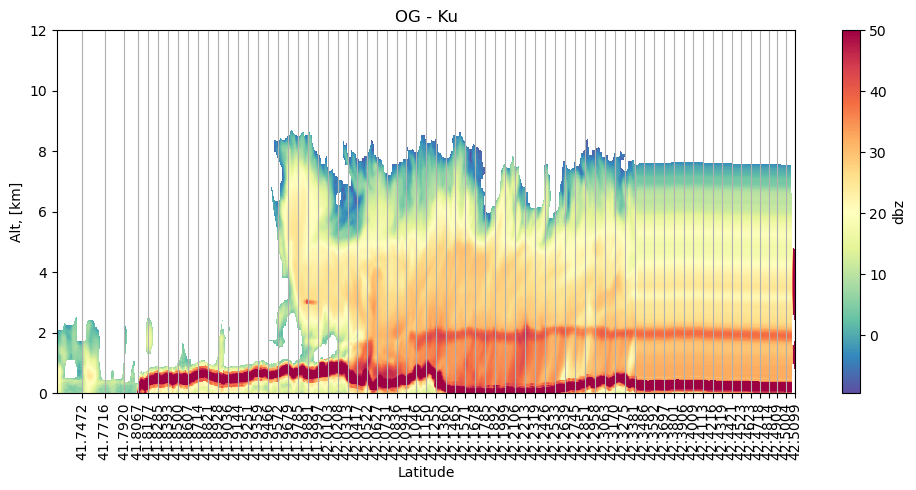

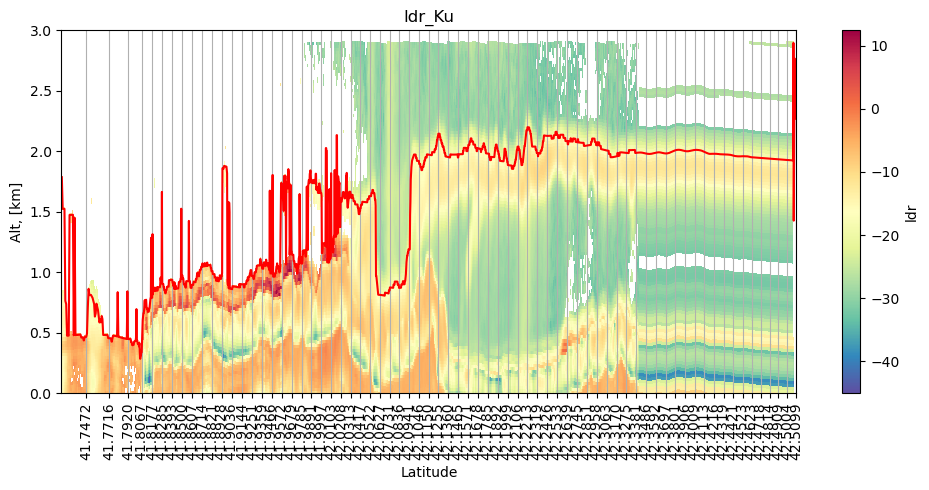

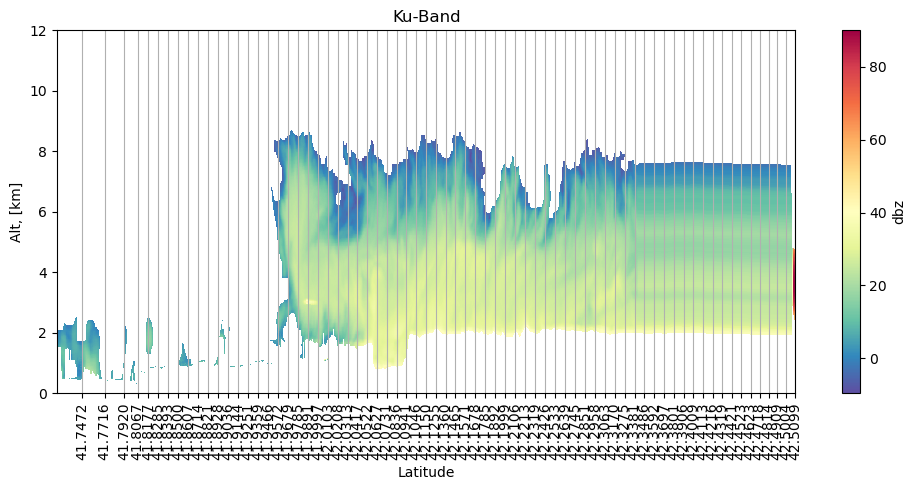

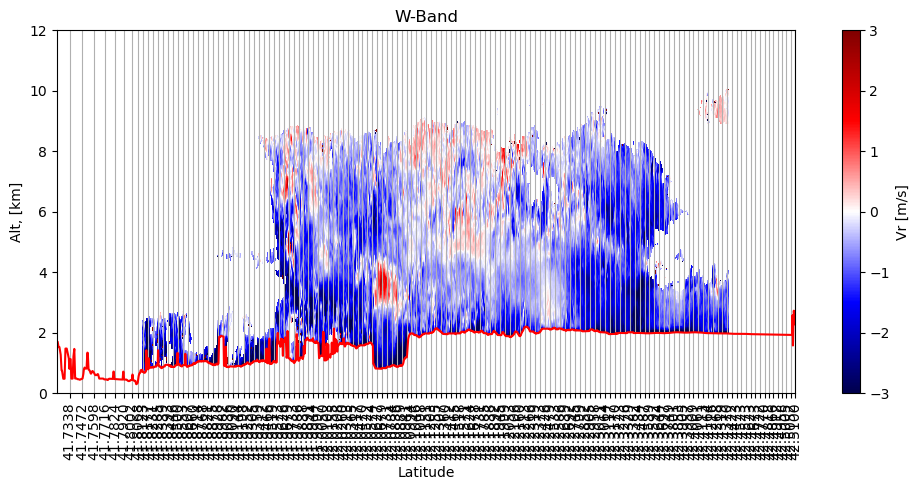

In [93]:
thresh_hgt= 2900
EPI_thresh_hgt= 900

#### Radar Data
if day[0:4]=='2020':
    hiwrap = er2read_gen(hifile_ka)#, ldr_ml=-23)
if day[0:4]!='2020':
    hiwrap = hiwrap_22_23(hifile_ka,hifile_ku)#, ldr_ml=-23)
if day[0:4]!='2023':
    crs = er2read_gen(wfile, vel_sigma=1, max_roll=2)
    crs['vel_W'] = despeckle(crs['vel_W'], sigma=1.)

hiwrap['dbz_Ku'] = despeckle(hiwrap['dbz_Ku'], sigma=1.)
hiwrap['dbz_Ka'] = despeckle(hiwrap['dbz_Ka'], sigma=1.)
hiwrap['vel_Ka'] = despeckle(hiwrap['vel_Ka'], sigma=1)
hiwrap['vel_Ku'] = despeckle(hiwrap['vel_Ku'], sigma=1)

dfr=hiwrap['dbz_Ku']-hiwrap['dbz_Ka']

# #### Removing the melting layer
#for n in range(len(fls2)):
for n in range(1):
    n=3
    start2=er2_fl[n][0]
    end2=er2_fl[n][1]
    print(er2_fl[n][2])
    
    if (er2_fl[n][2]=='1')& (day=='20200125'):
        thresh=-22
        smooth_flt=1000
        ldr_band='ldr_Ka'
    else:
        if (day[0:4]=='2020')|(day[0:4]=='2022'):  #20200125
            thresh=-18#-22
            smooth_flt=1000
            ldr_band='ldr_Ku'
        if day[0:4]=='2023': #day=='20230113':
            thresh=-20
            smooth_flt=300
            ldr_band='ldr_Ka'
        if day=='20220217':
            thresh=-20
            smooth_flt=300
            ldr_band='ldr_Ku'
    print(thresh, ldr_band)
    
    hi_sti_time = np.where(hiwrap['time']==np.datetime64(start2))[0][0]
    hi_edi_time = np.where(hiwrap['time']==np.datetime64(end2))[0][0]
    if day[0:4]!='2023':    
        crs_sti_time = np.where(crs['time']==np.datetime64(start2))[0][0]
        crs_edi_time = np.where(crs['time']==np.datetime64(end2))[0][0]

    ### Test Plot
    plt.figure(figsize=(10,5))
    plt.pcolormesh(hiwrap['lat'][hi_sti_time:hi_edi_time],hiwrap['alt_gate'][:,hi_sti_time:hi_edi_time]/1000.,hiwrap['dbz_Ku'][:,hi_sti_time:hi_edi_time], cmap='Spectral_r',vmax=50)
    plt.colorbar(label='dbz')
    plt.ylim([0,12])
    plt.xticks(hiwrap['lat'][hi_sti_time:hi_edi_time][::30], rotation=90)
    plt.title('OG - Ku')
    plt.xlabel('Latitude')
    plt.ylabel('Alt, [km]')
    plt.grid(axis='x')
    plt.tight_layout()

    if day!='20220219':
        if day[0:4]!='2023':
            melt_lay(hiwrap,dfr,ldr_band, hi_sti_time, hi_edi_time, thresh_hgt, thresh, radar2=crs, starti2=crs_sti_time, stopi2=crs_edi_time)
        if day[0:4]=='2023':
            melt_lay(hiwrap,dfr,ldr_band, hi_sti_time, hi_edi_time, thresh_hgt, thresh)

In [122]:
PSD_ds

<xarray.Dataset> Size: 2MB
Dimensions:              (Time: 4023, binmid: 38, binend: 39, bin_width: 38)
Coordinates:
  * Time                 (Time) datetime64[ns] 32kB 2020-01-25T18:52:46 ... 2...
  * binmid               (binmid) float32 152B 112.5 137.5 ... 2.25e+04 2.75e+04
  * binend               (binend) float32 156B 100.0 125.0 ... 2.5e+04 3e+04
  * bin_width            (bin_width) float32 152B 25.0 25.0 50.0 ... 5e+03 5e+03
Data variables:
    Average_CONC         (Time, binmid) float64 1MB nan nan nan ... nan nan nan
    Average_ASPECTRATIO  (Time, binmid) float32 611kB nan nan nan ... nan nan
    nav_alt              (Time) float64 32kB ...
    nav_lat              (Time) float64 32kB ...
    nav_lon              (Time) float64 32kB ...
    nav_temp             (Time) float64 32kB ...
Attributes:
    bin_endpoints:  [  100.   125.   150.   200.   250.   300.   350.   400. ...
    bin_midpoints:  [  112.5   137.5   175.    225.    275.    325.    375.  ...

In [125]:
# If want to match radar data

#for n in range(len(hrrr_cs_files_sort)):
for n in range(1):
    n=3
    fl=p3_fl[n][2]
    p3_st=p3_fl[n][0]
    p3_et=p3_fl[n][1]

    er2_st=er2_fl[n][0]
    er2_et=er2_fl[n][1]
    
    if day[0:4]!=2023:
        match_crs = match_radar_ml(crs, PSD_ds, 'CRS', 4000, np.datetime64(er2_st), np.datetime64(er2_et), p3_st, p3_et, query_k=30,outlier_method='iqr', return_indices=False)
        
    match_hiwrap = match_radar_ml(hiwrap, PSD_ds, 'HIWRAP', 4000, np.datetime64(er2_st), np.datetime64(er2_et), p3_st, p3_et, query_k=30,outlier_method='iqr', return_indices=False)
    match_dfr=match_hiwrap['matched']['dbz_Ku']['data'][:]-match_hiwrap['matched']['dbz_Ka']['data'][:]

Times: 2020-01-25T21:04:30 2020-01-25T21:22:15
CRS
No Outlier Method W for all Gates
Selected P3 Times: <xarray.DataArray 'Time' (Time: 228)> Size: 2kB
array(['2020-01-25T21:02:01.000000000', '2020-01-25T21:02:06.000000000',
       '2020-01-25T21:02:11.000000000', ..., '2020-01-25T21:20:46.000000000',
       '2020-01-25T21:20:51.000000000', '2020-01-25T21:20:56.000000000'],
      shape=(228,), dtype='datetime64[ns]')
Coordinates:
  * Time     (Time) datetime64[ns] 2kB 2020-01-25T21:02:01 ... 2020-01-25T21:...
Passed projection
Passed Finding Nearest ER-2 Gates. Shape:  (228, 30)
Nearest  30 Points matched. Using Barnes Weighted Mean
CRS Matched
Outlier Method IQR for Matched Gates
Barnes Weighted Mean - DBZ Done
Barnes Weighted Mean - Vel Done
Barnes Weighted Mean - Time Diff Done
Barnes Weighted Mean - ER2/P3 Distance Done
Barnes Weighted Mean - ER2 Lat, Long, Alt Done
Matched Object Made
Times: 2020-01-25T21:04:30 2020-01-25T21:22:15
HIWRAP
No Outlier Method W for all Gates
Selected 

/data/keeling/a/kheimes2/miniconda3/envs/xarray-climate/lib/python3.13/site-packages/numpy/lib/_nanfunctions_impl.py:1406: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


Barnes Weighted Mean - Time Diff Done
Barnes Weighted Mean - ER2/P3 Distance Done
Barnes Weighted Mean - ER2 Lat, Long, Alt Done
Matched Object Made


4


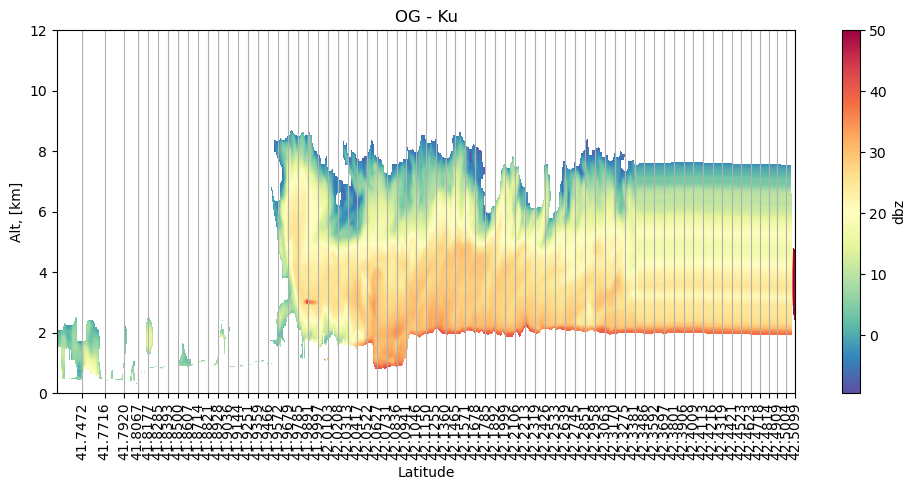

In [ ]:
for n in range(1):
    n=3
    start2=er2_fl[n][0]
    end2=er2_fl[n][1]
    print(er2_fl[n][2])

    hi_sti_time = np.where(hiwrap['time']==np.datetime64(start2))[0][0]
    hi_edi_time = np.where(hiwrap['time']==np.datetime64(end2))[0][0]
    if day[0:4]!='2023':    
        crs_sti_time = np.where(crs['time']==np.datetime64(start2))[0][0]
        crs_edi_time = np.where(crs['time']==np.datetime64(end2))[0][0]

    ### Test Plot
    plt.figure(figsize=(10,5))
    plt.pcolormesh(hiwrap['lat'][hi_sti_time:hi_edi_time],hiwrap['alt_gate'][:,hi_sti_time:hi_edi_time]/1000.,hiwrap['dbz_Ku'][:,hi_sti_time:hi_edi_time], cmap='Spectral_r',vmax=50)
    plt.colorbar(label='dbz')
    plt.ylim([0,12])
    plt.xticks(hiwrap['lat'][hi_sti_time:hi_edi_time][::30], rotation=90)
    plt.title('OG - Ku')
    plt.xlabel('Latitude')
    plt.ylabel('Alt, [km]')
    plt.grid(axis='x')
    plt.tight_layout()

In [ ]:
####### Test PLOTS
### Rimed
n=0
fig, ax= plt.subplots(figsize=(16,10))
ax.set_ylim(ymin,ymax)
ax2=ax.twiny()

time_plt= hiwrap['time'][hi_sti_time:hi_edi_time][hi_sti:hi_edi]
alt_plt= hiwrap['alt_gate'][:,hi_sti_time:hi_edi_time][:,hi_sti:hi_edi]/1000
lat_plt= hiwrap['lat'][hi_sti_time:hi_edi_time][hi_sti:hi_edi]

# ax= contourf of retrieval
pcm=ax.pcolormesh(lat_plt,alt_plt,var_ls_mlr[n],cmap='Spectral_r', vmin= np.nanmin(var_ls_mlr[n])-1,vmax=np.nanquantile(var_ls_mlr[n],.98))
cb1 = fig.colorbar(pcm,  ax=ax, shrink=.85, pad=0.04)
cb1.ax.tick_params(labelsize=12)
cb1.ax.set_ylabel(var_nm_ls_match_mlr[n]+' '+units_ls_mp[n], fontsize=16)

ax.set_ylabel("Height (km)", fontsize=14)
ax.set_xlabel("ER-2 Latitude", fontsize=14)
ax.set_xticks(lat_plt[::30])
ax.set_xticklabels(np.round(lat_plt[::30],2), rotation=90)

# ax2= P3 altitude and terrain height (basically same laitudes)
ax2.plot(mp_fl.Lat.values, mp_fl.Alt.values/1000, color='grey', linestyle='--')
ax2.fill_between(hrrr['latitude'], hrrr['orog']/1000, 0,facecolor='saddlebrown',interpolate=True, zorder=10)

ax2.set_xticks(mp_fl.Lat.values[::30])
ax2.set_xticklabels(np.round(mp_fl.Lat.values,2)[::30], rotation=90)
ax2.set_xlabel("P3 Latitude", fontsize=14)

ax3=ax.twinx()
ax3.plot(results_df['P3 Lat'].values, results_df[var_nm_ls_match_mlr[n]], c='k')#,label=interp_avg.columns[n])
ax3.set_ylabel('Matched '+var_nm_ls_match_mlr[n], fontsize=14)
plt.tight_layout()
### Unrimed
fig, ax= plt.subplots(figsize=(16,10))
ax.set_ylim(ymin,ymax)
ax2=ax.twiny()

time_plt= hiwrap['time'][hi_sti_time:hi_edi_time][hi_sti:hi_edi]
alt_plt= hiwrap['alt_gate'][:,hi_sti_time:hi_edi_time][:,hi_sti:hi_edi]/1000
lat_plt= hiwrap['lat'][hi_sti_time:hi_edi_time][hi_sti:hi_edi]

# ax= contourf of retrieval
pcm=ax.pcolormesh(lat_plt,alt_plt,var_ls_mlunr[n],cmap='Spectral_r', vmin= np.nanmin(var_ls_mlunr[n])-1,vmax=np.nanquantile(var_ls_mlunr[n],.98))
cb1 = fig.colorbar(pcm,  ax=ax, shrink=.85, pad=0.04)
cb1.ax.tick_params(labelsize=12)
cb1.ax.set_ylabel(var_nm_ls_match_mlunr[n]+' '+units_ls_mp[n], fontsize=16)
ax.set_ylabel("Height (km)", fontsize=14)
ax.set_xlabel("Time starting on: "+day, fontsize=14)
ax.set_xticks(lat_plt[::30])
ax.set_xticklabels(np.round(lat_plt[::30],2), rotation=90)

# ax2= P3 altitude and terrain height (basically same laitudes)
ax2.plot(mp_fl.Lat.values, mp_fl.Alt.values/1000, color='grey', linestyle='--')
ax2.fill_between(hrrr['latitude'], hrrr['orog']/1000, 0,facecolor='saddlebrown',interpolate=True, zorder=10)

ax2.set_xticks(mp_fl.Lat.values[::30])
ax2.set_xticklabels(np.round(mp_fl.Lat.values,2)[::30], rotation=90)
ax2.set_xlabel("P3 Latitude", fontsize=14)

ax3=ax.twinx()
ax3.plot(results_df['P3 Lat'].values, results_df[var_nm_ls_match_mlunr[n]], c='k')#,label=interp_avg.columns[n])
ax3.set_ylabel('Matched '+var_nm_ls_match_mlunr[n], fontsize=14)
plt.tight_layout()